In [1]:
import pandas as pd
import numpy as np

In [3]:
import pandas as pd
import numpy as np

# Install gdown if not already installed
!pip install -q gdown
import gdown

# --- Replace YOUR_FILE_ID with the actual Google Drive File IDs for your CSV files ---
# Example: gdown.download(id='1sH7f4kFjC9...r5B-g', output='events.csv', quiet=False)

# Download events.csv
gdown.download(id='1vnYHsdLWMoHyhqUj7ENED9QpJZh6ykTr', output='events.csv', quiet=False)
# Download countries.csv
gdown.download(id='1Nf2LH2dYi0w03jGToINviMxd6hGTbQ-M', output='countries.csv', quiet=False)
# Download products.csv
gdown.download(id='1CYEX6l60ewqfYH6EhsvwNIFr0WbNq4ce', output='products.csv', quiet=False)

# Load the downloaded CSV files
events_data = pd.read_csv("events.csv")
countries_data = pd.read_csv("countries.csv",  na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NULL', 'NaN', 'None', 'n/a', 'nan', 'null '], keep_default_na=False)
products_data = pd.read_csv("products.csv")

print("Data files downloaded and loaded successfully.")


Downloading...
From: https://drive.google.com/uc?id=1vnYHsdLWMoHyhqUj7ENED9QpJZh6ykTr
To: /content/events.csv
100%|██████████| 89.5k/89.5k [00:00<00:00, 36.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Nf2LH2dYi0w03jGToINviMxd6hGTbQ-M
To: /content/countries.csv
100%|██████████| 11.7k/11.7k [00:00<00:00, 12.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1CYEX6l60ewqfYH6EhsvwNIFr0WbNq4ce
To: /content/products.csv
100%|██████████| 199/199 [00:00<00:00, 1.03MB/s]

Data files downloaded and loaded successfully.


# Task
Perform a comprehensive data analysis on sales data from "events.csv", "countries.csv", and "products.csv". This analysis includes data overview, cleaning (missing values, data types, duplicates, anomalies), merging the datasets, calculating key performance metrics (total orders, profit, covered countries), analyzing sales by product categories, geography, and sales channels, analyzing shipping time and its impact on profit, investigating sales dynamics and seasonality over time, and generating a detailed report with code, charts, and business conclusions.

## Data Overview

### Subtask:
Load the dataset, familiarize with columns, describe data, and identify key fields for table connection.


**Reasoning**:
To familiarize with the datasets, I will display the first 5 rows of each DataFrame, print concise summaries, and generate descriptive statistics for `events_data`, `countries_data`, and `products_data`.



In [ ]:
print("Events Data - First 5 Rows:")
print(events_data.head())
print("\nCountries Data - First 5 Rows:")
print(countries_data.head())
print("\nProducts Data - First 5 Rows:")
print(products_data.head())

print("\nEvents Data - Info:")
events_data.info()
print("\nCountries Data - Info:")
countries_data.info()
print("\nProducts Data - Info:")
products_data.info()

print("\nEvents Data - Descriptive Statistics:")
print(events_data.describe())
print("\nCountries Data - Descriptive Statistics:")
print(countries_data.describe())
print("\nProducts Data - Descriptive Statistics:")
print(products_data.describe())

Events Data - First 5 Rows:
    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  

Countries Data - First 5 Rows:
             name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX  

The initial overview of the datasets reveals the following:

**events_data DataFrame:**
- Contains `Order ID`, `Order Date`, `Ship Date`, `Order Priority`, `Country Code`, `Product ID`, `Sales Channel`, `Units Sold`, `Unit Price`, and `Unit Cost`.
- `Order Date` and `Ship Date` are currently `object` type and will need to be converted to datetime objects.
- `Country Code` has 1248 non-null values out of 1330 entries, indicating missing values.
- `Units Sold` has 1328 non-null values, also indicating missing values.
- `Product ID` and `Country Code` appear to be key fields for connecting with `products_data` and `countries_data`, respectively.

**countries_data DataFrame:**
- Contains `name`, `alpha-2`, `alpha-3`, `region`, and `sub-region`.
- `region` and `sub-region` have 248 non-null values out of 249, suggesting one missing value in each column.
- `alpha-2` and `alpha-3` are potential key fields for connecting with `events_data` via `Country Code`.

**products_data DataFrame:**
- Contains `id` and `item_type`.
- All columns are complete with no missing values.
- `id` is the key field for connecting with `events_data` via `Product ID`.

**Key fields for table connection:**
- `events_data['Country Code']` can be joined with `countries_data['alpha-3']` (or `alpha-2` if a suitable common format is identified).
- `events_data['Product ID']` can be joined with `products_data['id']`.

## Data Cleaning - Missing Values

### Subtask:
Check for and handle missing values in each table, assessing proportion and understanding reasons for occurrence. Fill or delete missing values with justification.


**Reasoning**:
First, I will identify all columns with missing values in each DataFrame (`events_data`, `countries_data`, `products_data`) and calculate the count and percentage of these missing values to get a comprehensive overview.



In [ ]:
print("Missing Values in events_data:")
missing_events = events_data.isnull().sum()
missing_events = missing_events[missing_events > 0]
missing_events_percent = (missing_events / len(events_data)) * 100
missing_events_df = pd.DataFrame({'Missing Count': missing_events, 'Missing Percentage': missing_events_percent})
print(missing_events_df.sort_values(by='Missing Percentage', ascending=False))

print("\nMissing Values in countries_data:")
missing_countries = countries_data.isnull().sum()
missing_countries = missing_countries[missing_countries > 0]
missing_countries_percent = (missing_countries / len(countries_data)) * 100
missing_countries_df = pd.DataFrame({'Missing Count': missing_countries, 'Missing Percentage': missing_countries_percent})
print(missing_countries_df.sort_values(by='Missing Percentage', ascending=False))

print("\nMissing Values in products_data:")
missing_products = products_data.isnull().sum()
missing_products = missing_products[missing_products > 0]
missing_products_percent = (missing_products / len(products_data)) * 100
missing_products_df = pd.DataFrame({'Missing Count': missing_products, 'Missing Percentage': missing_products_percent})
print(missing_products_df.sort_values(by='Missing Percentage', ascending=False))

Missing Values in events_data:
              Missing Count  Missing Percentage
Country Code             82            6.165414
Units Sold                2            0.150376

Missing Values in countries_data:
            Missing Count  Missing Percentage
region                  1            0.401606
sub-region              1            0.401606

Missing Values in products_data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


**Reasoning**:
Now that the missing value counts and percentages are clear, I will investigate the specific rows in `events_data` where `Country Code` and `Units Sold` are missing to understand their context before deciding on an imputation or dropping strategy. This step helps in justifying the chosen method.



In [ ]:
print("Rows with missing Country Code in events_data:")
print(events_data[events_data['Country Code'].isnull()])

print("\nRows with missing Units Sold in events_data:")
print(events_data[events_data['Units Sold'].isnull()])

Rows with missing Country Code in events_data:
       Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
2     101025998  7/18/2014  8/11/2014              M          NaN        7940   
13    104548490   1/1/2014   1/5/2014              M          NaN        7331   
26    117929494  1/24/2015   3/2/2015              H          NaN        4594   
29    118859469   6/2/2011   7/1/2011              L          NaN        8969   
43    126948583  5/24/2017   7/9/2017              C          NaN        7331   
...         ...        ...        ...            ...          ...         ...   
1213  919922006  8/27/2011  9/18/2011              L          NaN        4594   
1220  922564303  3/17/2017   4/2/2017              L          NaN        7940   
1250  941061675   3/8/2017  3/20/2017              M          NaN        5988   
1296  975080668  7/23/2017  8/20/2017              C          NaN        5988   
1317  989102828  6/11/2012   7/8/2012              L          

**Reasoning**:
For `events_data`, given that `Country Code` is a crucial categorical variable for geographic analysis and dropping 6% of the rows might be too much, I will fill the missing values with 'Unknown'. For `Units Sold`, as there are only 2 missing values (0.15%), dropping these rows is a reasonable approach to avoid making assumptions through imputation.



In [ ]:
print("Handling missing values in events_data...")
events_data['Country Code'].fillna('Unknown', inplace=True)
events_data.dropna(subset=['Units Sold'], inplace=True)

print("Missing values in events_data after handling:")
print(events_data.isnull().sum()[events_data.isnull().sum() > 0])

Handling missing values in events_data...
Missing values in events_data after handling:
Series([], dtype: int64)


/tmp/ipython-input-794290949.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events_data['Country Code'].fillna('Unknown', inplace=True)


**Reasoning**:
The previous step produced a `FutureWarning` due to the `inplace=True` argument used with `fillna` on a DataFrame slice. To address this, I will modify the code to reassign the column explicitly, ensuring the operation is performed directly on the original DataFrame and future-proofing the code against changes in pandas behavior. The functionality of dropping rows with missing 'Units Sold' remains unchanged as it did not produce any warnings.



In [ ]:
print("Handling missing values in events_data...")
events_data['Country Code'] = events_data['Country Code'].fillna('Unknown')
events_data.dropna(subset=['Units Sold'], inplace=True)

print("Missing values in events_data after handling:")
print(events_data.isnull().sum()[events_data.isnull().sum() > 0])

Handling missing values in events_data...
Missing values in events_data after handling:
Series([], dtype: int64)


**Reasoning**:
Now that missing values in `events_data` have been handled, I will investigate the specific row(s) in `countries_data` where `region` and `sub-region` are missing. This step will help determine if manual imputation is feasible based on the country 'name' or if another strategy is required.



In [ ]:
print("Rows with missing region or sub-region in countries_data:")
print(countries_data[countries_data['region'].isnull() | countries_data['sub-region'].isnull()])

Rows with missing region or sub-region in countries_data:
         name alpha-2 alpha-3 region sub-region
8  Antarctica      AQ     ATA    NaN        NaN


**Reasoning**:
Since 'Antarctica' is identified as the country with missing `region` and `sub-region`, and it's a unique geographical entity, I will fill both `region` and `sub-region` with 'Antarctica' to maintain data integrity for this specific case.



In [ ]:
print("Handling missing values in countries_data...")
countries_data.loc[countries_data['name'] == 'Antarctica', 'region'] = 'Antarctica'
countries_data.loc[countries_data['name'] == 'Antarctica', 'sub-region'] = 'Antarctica'

print("Missing values in countries_data after handling:")
print(countries_data.isnull().sum()[countries_data.isnull().sum() > 0])

Handling missing values in countries_data...
Missing values in countries_data after handling:
Series([], dtype: int64)


## Data Cleaning - Data Types

### Subtask:
Check and correct data types, resolving discrepancies and transforming column types as necessary.


**Reasoning**:
To align with the subtask's objective of correcting data types, I will convert the 'Order Date' and 'Ship Date' columns in `events_data` to datetime objects. Then, I will verify the data types of all columns in `events_data`, `countries_data`, and `products_data` using `info()` to confirm the changes and ensure all types are appropriate for analysis.



In [ ]:
print("Converting 'Order Date' and 'Ship Date' to datetime objects...")
events_data['Order Date'] = pd.to_datetime(events_data['Order Date'])
events_data['Ship Date'] = pd.to_datetime(events_data['Ship Date'])

print("\nVerifying data types after conversion:")
print("\nEvents Data - Info:")
events_data.info()
print("\nCountries Data - Info:")
countries_data.info()
print("\nProducts Data - Info:")
products_data.info()

Converting 'Order Date' and 'Ship Date' to datetime objects...

Verifying data types after conversion:

Events Data - Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1328 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1328 non-null   int64         
 1   Order Date      1328 non-null   datetime64[ns]
 2   Ship Date       1328 non-null   datetime64[ns]
 3   Order Priority  1328 non-null   object        
 4   Country Code    1328 non-null   object        
 5   Product ID      1328 non-null   int64         
 6   Sales Channel   1328 non-null   object        
 7   Units Sold      1328 non-null   float64       
 8   Unit Price      1328 non-null   float64       
 9   Unit Cost       1328 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 114.1+ KB

Countries Data - Info:
<class 'pandas.core.frame.DataFrame'>
Range

## Data Cleaning - Duplicates and Anomalies

### Subtask:
Investigate data for duplicates (considering extra spaces, case, etc.) and anomalies, performing transformations and understanding causes.


**Reasoning**:
To begin the duplicate and anomaly detection, I will first check for and count fully duplicate rows in the `events_data` DataFrame.



In [ ]:
print("Checking for duplicate rows in events_data...")
duplicate_events_count = events_data.duplicated().sum()
print(f"Number of duplicate rows found in events_data: {duplicate_events_count}")

Checking for duplicate rows in events_data...
Number of duplicate rows found in events_data: 0


**Reasoning**:
Following the duplicate detection instructions, I will now check for and count fully duplicate rows in the `countries_data` DataFrame.



In [ ]:
print("\nChecking for duplicate rows in countries_data...")
duplicate_countries_count = countries_data.duplicated().sum()
print(f"Number of duplicate rows found in countries_data: {duplicate_countries_count}")


Checking for duplicate rows in countries_data...
Number of duplicate rows found in countries_data: 0


**Reasoning**:
Continuing with the duplicate detection, I will now check for and count fully duplicate rows in the `products_data` DataFrame.



In [ ]:
print("\nChecking for duplicate rows in products_data...")
duplicate_products_count = products_data.duplicated().sum()
print(f"Number of duplicate rows found in products_data: {duplicate_products_count}")


Checking for duplicate rows in products_data...
Number of duplicate rows found in products_data: 0


**Reasoning**:
Now that full duplicates have been checked, I will proceed to examine unique values in specified string columns across all DataFrames to identify potential inconsistencies like case variations or extra spaces, as per the subtask instructions.



In [ ]:
print("\nUnique values in events_data string columns:")
for col in ['Order Priority', 'Country Code', 'Sales Channel']:
    print(f"\n{col}: {events_data[col].unique()}")

print("\nUnique values in countries_data string columns:")
for col in ['name', 'alpha-2', 'alpha-3', 'region', 'sub-region']:
    print(f"\n{col}: {countries_data[col].unique()}")

print("\nUnique values in products_data string columns:")
for col in ['item_type']:
    print(f"\n{col}: {products_data[col].unique()}")


Unique values in events_data string columns:

Order Priority: ['M' 'C' 'L' 'H' ' C' 'M ']

Country Code: ['NOR' 'SRB' 'Unknown' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO'
 'GBR' 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE'
 'PRT' 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA'
 'IRL' 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']

Sales Channel: ['Online' 'Offline' 'online']

Unique values in countries_data string columns:

name: ['Afghanistan' 'Åland Islands' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Anguilla' 'Antarctica' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda' 'Bhutan' 'Bolivia (Plurinational State of)'
 'Bonaire, Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Bouvet Island' 'Brazil' 'British Indian Ocean Territory'
 'Brunei Darussalam' 'Bulgaria' 'Burkin

**Reasoning**:
Based on the unique values identified, I will now clean the 'Order Priority' and 'Sales Channel' columns in the `events_data` DataFrame by stripping leading/trailing whitespace and standardizing case to resolve inconsistencies. This aligns with step 5 of the subtask.



In [ ]:
print("Cleaning 'Order Priority' and 'Sales Channel' in events_data...")
events_data['Order Priority'] = events_data['Order Priority'].str.strip()
events_data['Sales Channel'] = events_data['Sales Channel'].str.capitalize()

print("Verifying unique values after cleaning:")
print(f"\nOrder Priority: {events_data['Order Priority'].unique()}")
print(f"\nSales Channel: {events_data['Sales Channel'].unique()}")

Cleaning 'Order Priority' and 'Sales Channel' in events_data...
Verifying unique values after cleaning:

Order Priority: ['M' 'C' 'L' 'H']

Sales Channel: ['Online' 'Offline']


## Data Merging and Preparation

### Subtask:
Merge the three tables into a single DataFrame, remove unnecessary columns, and rename columns as needed.


**Reasoning**:
To begin merging the datasets as instructed, I will perform a left merge of `events_data` with `products_data` using `Product ID` from `events_data` and `id` from `products_data` as the join keys. This will combine product details with event data.



In [ ]:
print("Merging events_data with products_data...")
df_merged = pd.merge(events_data, products_data, how='left', left_on='Product ID', right_on='id')

print("First 5 rows of df_merged after product merge:")
print(df_merged.head())

Merging events_data with products_data...
First 5 rows of df_merged after product merge:
    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type  
0        Online       650.0      205.70     117.11  2103     Cereal  
1       Offline      1993.0      205.70     117.11  2103     Cereal  
2        Online      4693.0      668.27     502.54  7940  Household  
3        Online      1171.0      109.28      35.84  2455    Clothes  
4       Offline      7648.0       47.45      31.79  1270  Beverages  


**Reasoning**:
Now that `df_merged` contains product details, I will merge it with `countries_data` using 'Country Code' from `df_merged` and 'alpha-3' from `countries_data` to incorporate geographical information, as per the instructions.



In [ ]:
print("Merging df_merged with countries_data...")
df_merged = pd.merge(df_merged, countries_data, how='left', left_on='Country Code', right_on='alpha-3')

print("First 5 rows of df_merged after country merge:")
print(df_merged.head())

Merging df_merged with countries_data...
First 5 rows of df_merged after country merge:
    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type  \
0        Online       650.0      205.70     117.11  2103     Cereal   
1       Offline      1993.0      205.70     117.11  2103     Cereal   
2        Online      4693.0      668.27     502.54  7940  Household   
3        Online      1171.0      109.28      35.84  2455    Clothes   
4       Offline      7648.0       47.45      31.79  1270  Beverages   

         name al

**Reasoning**:
Following the merge operations, I will now rename the specified columns in `df_merged` to improve clarity and align with the subtask's requirements for consistent naming conventions.



In [ ]:
print("Renaming columns in df_merged...")
df_merged.rename(columns={'item_type': 'Product Category',
                          'name': 'Country Name',
                          'region': 'Region',
                          'sub-region': 'Sub-Region'},
                 inplace=True)

print("Current columns after renaming:")
print(df_merged.columns.tolist())

Renaming columns in df_merged...
Current columns after renaming:
['Order ID', 'Order Date', 'Ship Date', 'Order Priority', 'Country Code', 'Product ID', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost', 'id', 'Product Category', 'Country Name', 'alpha-2', 'alpha-3', 'Region', 'Sub-Region']


**Reasoning**:
Now that the necessary columns have been renamed, I will drop the `id`, `alpha-2`, and `alpha-3` columns from `df_merged` as they are no longer needed after the merge operations, aligning with the subtask's instructions to remove unnecessary columns.



In [ ]:
print("Dropping unnecessary columns ('id', 'alpha-2', 'alpha-3') from df_merged...")
df_merged.drop(columns=['id', 'alpha-2', 'alpha-3'], inplace=True)

print("Current columns after dropping:")
print(df_merged.columns.tolist())

Dropping unnecessary columns ('id', 'alpha-2', 'alpha-3') from df_merged...
Current columns after dropping:
['Order ID', 'Order Date', 'Ship Date', 'Order Priority', 'Country Code', 'Product ID', 'Sales Channel', 'Units Sold', 'Unit Price', 'Unit Cost', 'Product Category', 'Country Name', 'Region', 'Sub-Region']


**Reasoning**:
To finalize the data merging and preparation subtask, I will display the first 5 rows of the `df_merged` DataFrame and print its concise information using `.info()` to verify that all merges were successful, columns are correctly named, unnecessary columns have been dropped, and data types are appropriate for further analysis, as specified in the instructions.



In [ ]:
print("Final check of df_merged after all operations:")
print("\nFirst 5 rows of df_merged:")
print(df_merged.head())

print("\nInformation about df_merged:")
df_merged.info()

Final check of df_merged after all operations:

First 5 rows of df_merged:
    Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      Unknown        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost Product Category  \
0        Online       650.0      205.70     117.11           Cereal   
1       Offline      1993.0      205.70     117.11           Cereal   
2        Online      4693.0      668.27     502.54        Household   
3        Online      1171.0      109.28      35.84          Clothes   
4       Offline      7648.0       47.45      31.79        Beverages   

  Country Name  Region       

## Key Performance Metrics

### Subtask:
Calculate and analyze key company performance metrics such as total number of orders, total profit, and total number of covered countries.


**Reasoning**:
To begin calculating key performance metrics, I will first calculate the 'Revenue' for each order by multiplying 'Units Sold' and 'Unit Price' and storing it in a new 'Revenue' column in the `df_merged` DataFrame, as per the instructions.



In [ ]:
print("Calculating 'Revenue' for each order...")
df_merged['Revenue'] = df_merged['Units Sold'] * df_merged['Unit Price']

print("First 5 rows with 'Revenue' column:")
print(df_merged[['Order ID', 'Units Sold', 'Unit Price', 'Revenue']].head())

Calculating 'Revenue' for each order...
First 5 rows with 'Revenue' column:
    Order ID  Units Sold  Unit Price     Revenue
0  100640618       650.0      205.70   133705.00
1  100983083      1993.0      205.70   409960.10
2  101025998      4693.0      668.27  3136191.11
3  102230632      1171.0      109.28   127966.88
4  103435266      7648.0       47.45   362897.60


**Reasoning**:
As per the instructions, I will now calculate the 'Cost' for each order by multiplying 'Units Sold' by 'Unit Cost' and store it in a new column called 'Cost' in the `df_merged` DataFrame.



In [ ]:
print("Calculating 'Cost' for each order...")
df_merged['Cost'] = df_merged['Units Sold'] * df_merged['Unit Cost']

print("First 5 rows with 'Cost' column:")
print(df_merged[['Order ID', 'Units Sold', 'Unit Cost', 'Cost']].head())

Calculating 'Cost' for each order...
First 5 rows with 'Cost' column:
    Order ID  Units Sold  Unit Cost        Cost
0  100640618       650.0     117.11    76121.50
1  100983083      1993.0     117.11   233400.23
2  101025998      4693.0     502.54  2358420.22
3  102230632      1171.0      35.84    41968.64
4  103435266      7648.0      31.79   243129.92


**Reasoning**:
As instructed, I will now calculate the 'Profit' for each order by subtracting the 'Cost' from the 'Revenue' and store the result in a new 'Profit' column in the `df_merged` DataFrame.



In [ ]:
print("Calculating 'Profit' for each order...")
df_merged['Profit'] = df_merged['Revenue'] - df_merged['Cost']

print("First 5 rows with 'Profit' column:")
print(df_merged[['Order ID', 'Revenue', 'Cost', 'Profit']].head())

Calculating 'Profit' for each order...
First 5 rows with 'Profit' column:
    Order ID     Revenue        Cost     Profit
0  100640618   133705.00    76121.50   57583.50
1  100983083   409960.10   233400.23  176559.87
2  101025998  3136191.11  2358420.22  777770.89
3  102230632   127966.88    41968.64   85998.24
4  103435266   362897.60   243129.92  119767.68


**Reasoning**:
Now that Revenue, Cost, and Profit columns are available, I will calculate their respective totals across all orders, as specified in instruction 4 of the subtask, and print these aggregate values.



In [ ]:
print("Calculating total revenue, total cost, and total profit...")
total_revenue = df_merged['Revenue'].sum()
total_cost = df_merged['Cost'].sum()
total_profit = df_merged['Profit'].sum()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Cost: {total_cost:,.2f}")
print(f"Total Profit: {total_profit:,.2f}")

Calculating total revenue, total cost, and total profit...
Total Revenue: 1,702,129,408.21
Total Cost: 1,200,694,949.21
Total Profit: 501,434,459.00


**Reasoning**:
Following the instructions, I will now calculate the total number of unique orders using the 'Order ID' column and print this count.



In [ ]:
print("Calculating total number of unique orders...")
total_orders = df_merged['Order ID'].nunique()

print(f"Total Number of Orders: {total_orders}")

Calculating total number of unique orders...
Total Number of Orders: 1328


**Reasoning**:
As specified in instruction 6, I will now calculate the total number of unique countries covered, ensuring to exclude 'Unknown' or null values from the 'Country Name' column, and then print this count.



In [ ]:
print("Calculating total number of unique countries covered...")
total_countries = df_merged[df_merged['Country Name'].notnull() & (df_merged['Country Name'] != 'Unknown')]['Country Name'].nunique()

print(f"Total Number of Covered Countries: {total_countries}")

Calculating total number of unique countries covered...
Total Number of Covered Countries: 45


## Sales Analysis and Visualization

### Subtask:
Analyze sales (revenue, expenses, profits, product popularity) and create visualizations by product categories, geography (countries, regions), and sales channels (online/offline).


**Reasoning**:
To enable visualization, I will import the necessary libraries, `matplotlib.pyplot` as `plt` and `seaborn` as `sns`, as instructed.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

**Reasoning**:
To analyze sales by product category, I will group the merged DataFrame by 'Product Category' and sum the 'Revenue', 'Profit', and 'Units Sold' as instructed, then sort by 'Revenue' in descending order and print the results.



In [ ]:
print("Aggregating sales data by Product Category...")
product_category_sales = df_merged.groupby('Product Category').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Revenue', ascending=False)

print("Aggregated Sales Data by Product Category:")
print(product_category_sales)

Aggregating sales data by Product Category...
Aggregated Sales Data by Product Category:
                       Revenue       Profit  Units Sold
Product Category                                       
Office Supplies   4.022140e+08  77977176.25    617641.0
Household         2.942052e+08  72962466.77    440249.0
Cosmetics         2.331548e+08  92723306.17    533291.0
Meat              2.237620e+08  30337736.00    530380.0
Baby Food         1.436476e+08  53940997.16    562706.0
Cereal            9.579140e+07  41255034.15    465685.0
Vegetables        8.974673e+07  36776002.72    582544.0
Snacks            7.478861e+07  27027422.40    490160.0
Clothes           6.462655e+07  43431314.40    591385.0
Personal Care     4.557902e+07  13975410.68    557678.0
Beverages         2.909316e+07   9601662.78    613133.0
Fruits            5.520300e+06   1425929.52    591672.0


**Reasoning**:
To visualize the total revenue by product category, I will create a bar plot using `product_category_sales` DataFrame, as instructed in step 5. I will set 'Product Category' on the x-axis and 'Revenue' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Revenue by Product Category...


/tmp/ipython-input-340037612.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_sales.index, y=product_category_sales['Revenue'], palette='viridis')


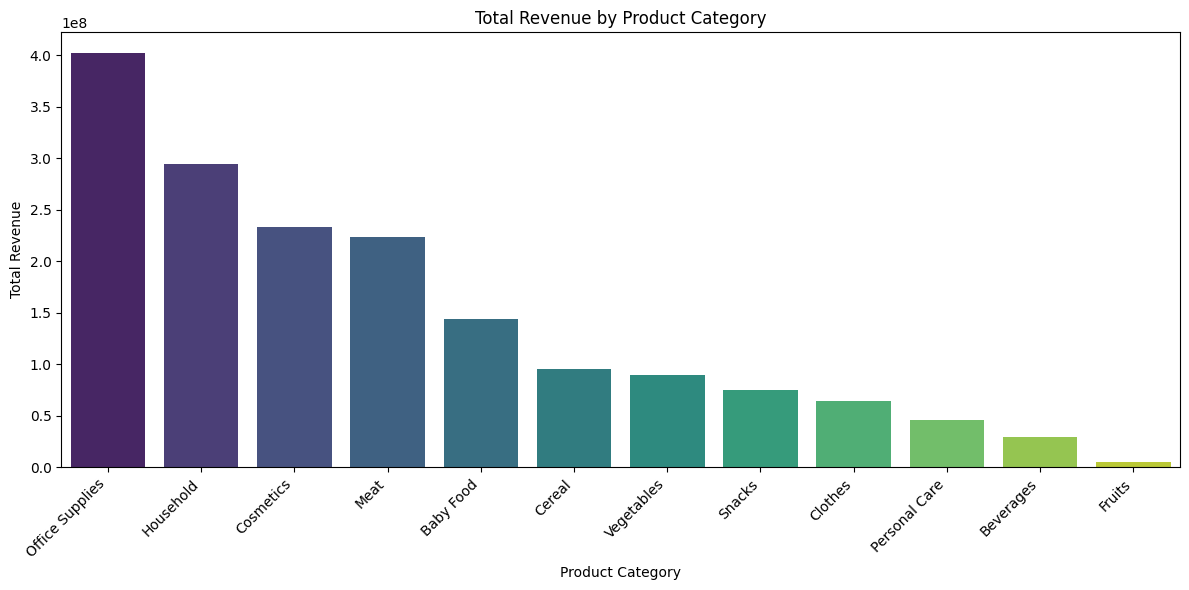

In [ ]:
print("Creating bar plot for Total Revenue by Product Category...")
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales['Revenue'], palette='viridis')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To address the `FutureWarning` from `seaborn`, I will explicitly assign the 'Product Category' to the `hue` parameter and set `legend=False` in the `barplot` function for the 'Total Revenue by Product Category' plot, as suggested by the warning message.



Creating bar plot for Total Revenue by Product Category...


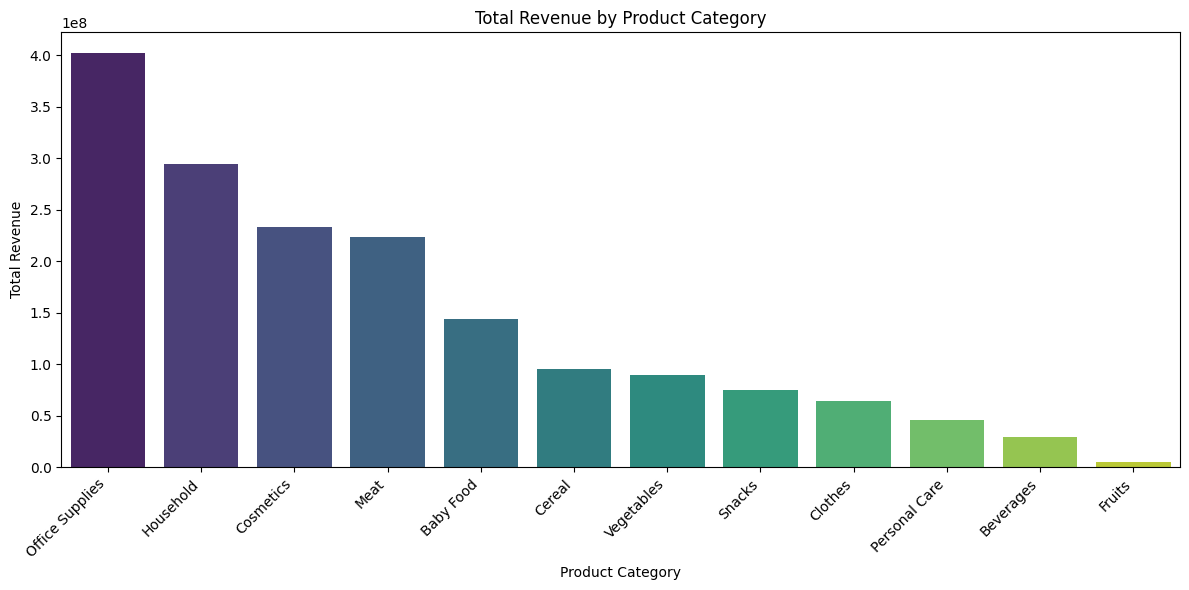

In [ ]:
print("Creating bar plot for Total Revenue by Product Category...")
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales['Revenue'], hue=product_category_sales.index, palette='viridis', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To continue with the sales analysis and visualization, I will now create a bar plot to visualize the 'Total Profit by Product Category', as instructed in step 6. I will use `product_category_sales` DataFrame, set 'Product Category' on the x-axis and 'Profit' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Profit by Product Category...


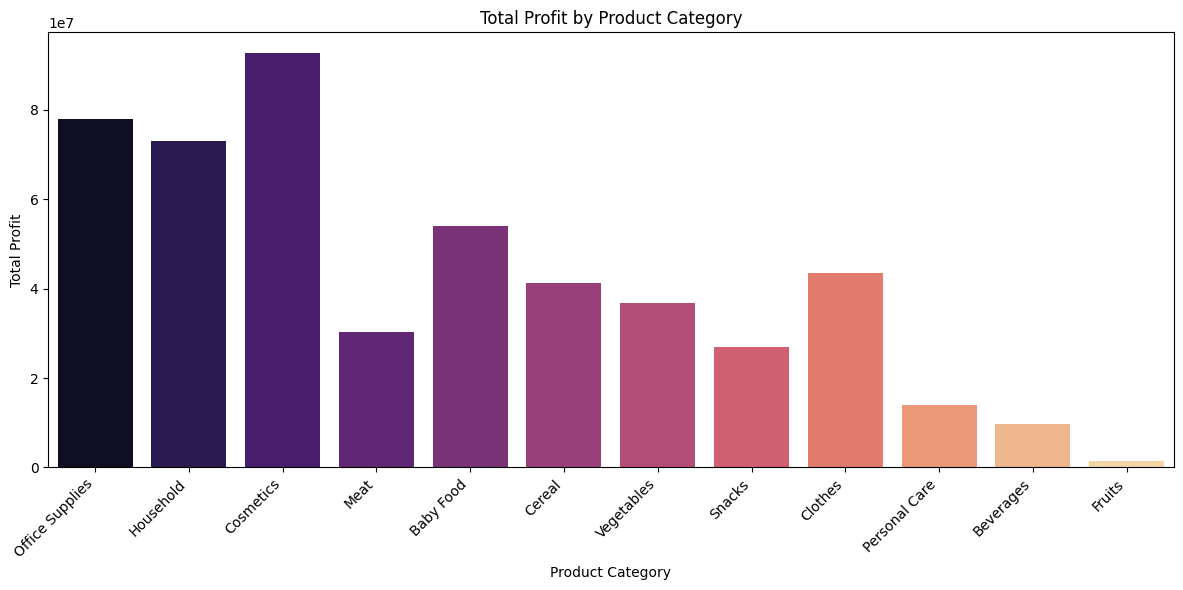

In [ ]:
print("Creating bar plot for Total Profit by Product Category...")
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales['Profit'], hue=product_category_sales.index, palette='magma', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.title('Total Profit by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the sales analysis and visualization for product categories, I will now create a bar plot to visualize the 'Total Units Sold by Product Category', as instructed in step 7. I will use the `product_category_sales` DataFrame, set 'Product Category' on the x-axis and 'Units Sold' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Units Sold by Product Category...


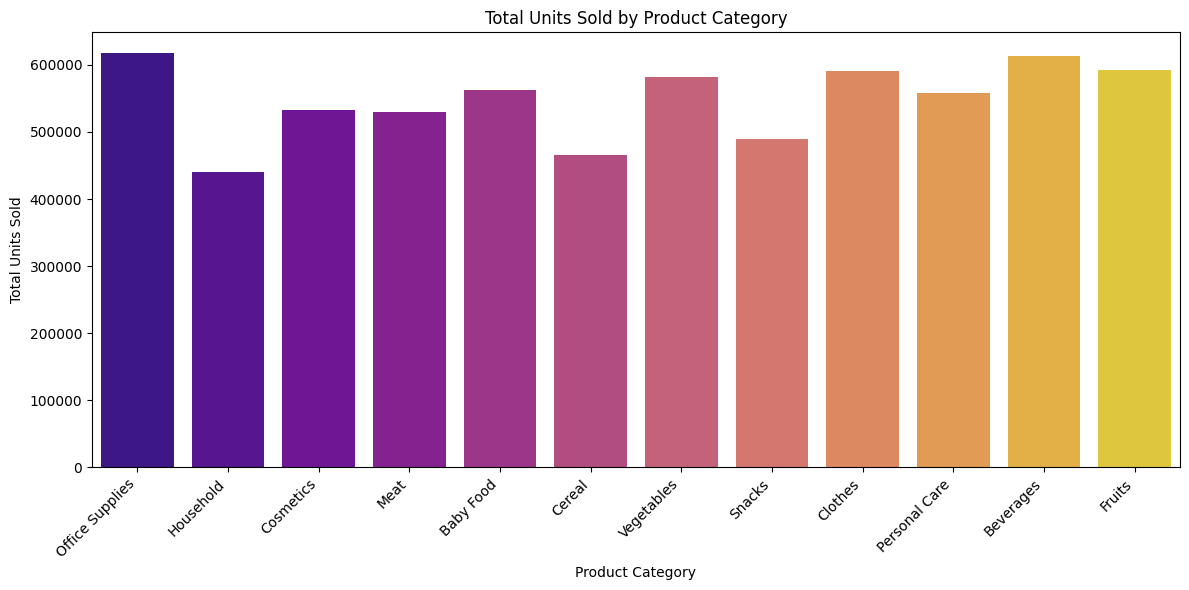

In [ ]:
print("Creating bar plot for Total Units Sold by Product Category...")
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_sales.index, y=product_category_sales['Units Sold'], hue=product_category_sales.index, palette='plasma', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze sales by geography, specifically by country, I will group the `df_merged` DataFrame by 'Country Name' and calculate the sum of 'Revenue', 'Profit', and 'Units Sold' for each country. I will exclude rows where 'Country Name' is 'Unknown' or null, then sort the results by 'Revenue' in descending order, and finally print the aggregated sales data.



In [ ]:
print("Aggregating sales data by Country Name...")
country_sales = df_merged[df_merged['Country Name'].notnull() & (df_merged['Country Name'] != 'Unknown')].groupby('Country Name').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Revenue', ascending=False)

print("Aggregated Sales Data by Country Name (Top 10):")
print(country_sales.head(10))

Aggregating sales data by Country Name...
Aggregated Sales Data by Country Name (Top 10):
                            Revenue       Profit  Units Sold
Country Name                                                
Czech Republic          53543932.14  13635593.78    142446.0
Ukraine                 53252317.54  14804925.74    164577.0
Bosnia and Herzegovina  50117508.49  13257602.77    153545.0
Macedonia               49222085.25  13684099.95    203078.0
San Marino              47883708.48  13792992.81    192228.0
Andorra                 47756693.17  15410036.63    185686.0
Portugal                47172189.84  11345407.59    124825.0
Malta                   47145320.81  14610127.88    173641.0
Russia                  46051659.81  13267682.64    165954.0
Slovakia                42940998.32  12052790.03    131540.0


**Reasoning**:
To visualize the total revenue by country, I will create a bar plot using the `country_sales` DataFrame, focusing on the top 10 countries to maintain readability, as instructed in step 9. I will set 'Country Name' on the x-axis and 'Revenue' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Revenue by Country (Top 10)...


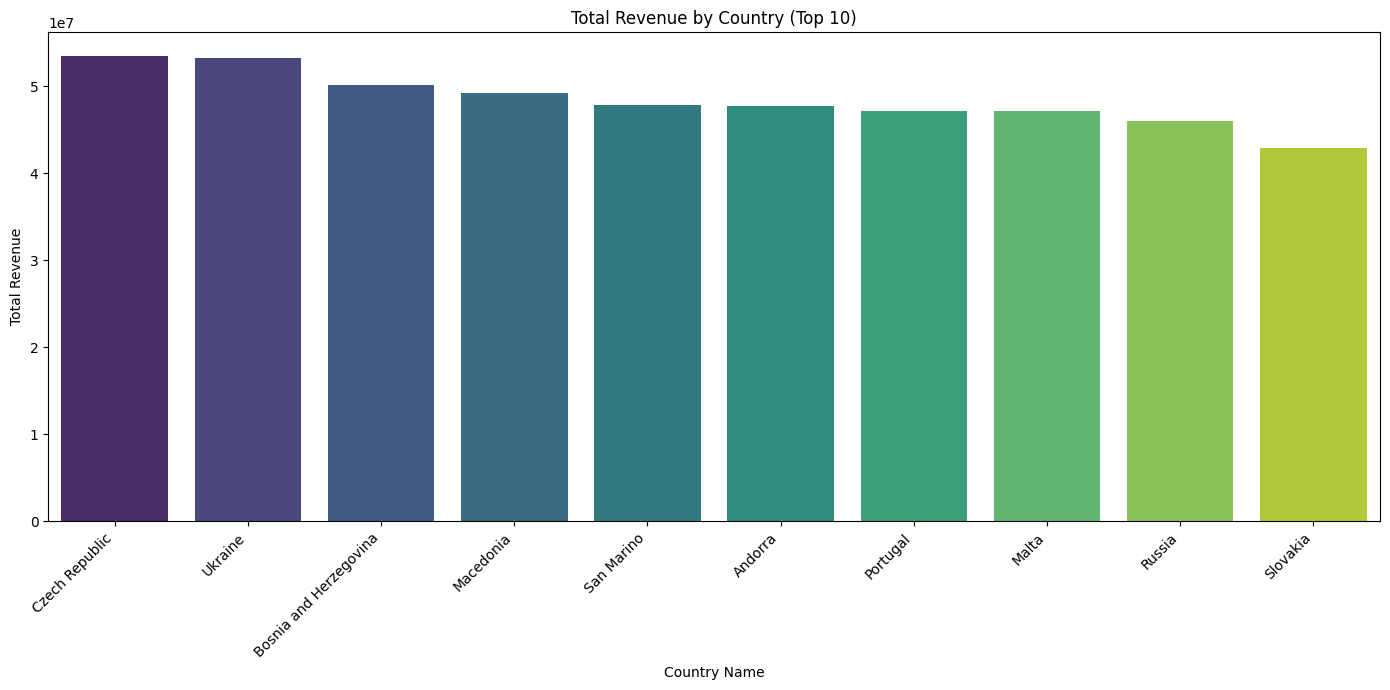

In [ ]:
print("Creating bar plot for Total Revenue by Country (Top 10)...")
plt.figure(figsize=(14, 7))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10)['Revenue'], hue=country_sales.head(10).index, palette='viridis', legend=False)
plt.xlabel('Country Name')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Country (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To continue the sales analysis by geography, I will now create a bar plot to visualize the 'Total Profit by Country (Top 10)', following the pattern established for product categories. I will use the `country_sales` DataFrame, set 'Country Name' on the x-axis and 'Profit' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Profit by Country (Top 10)...


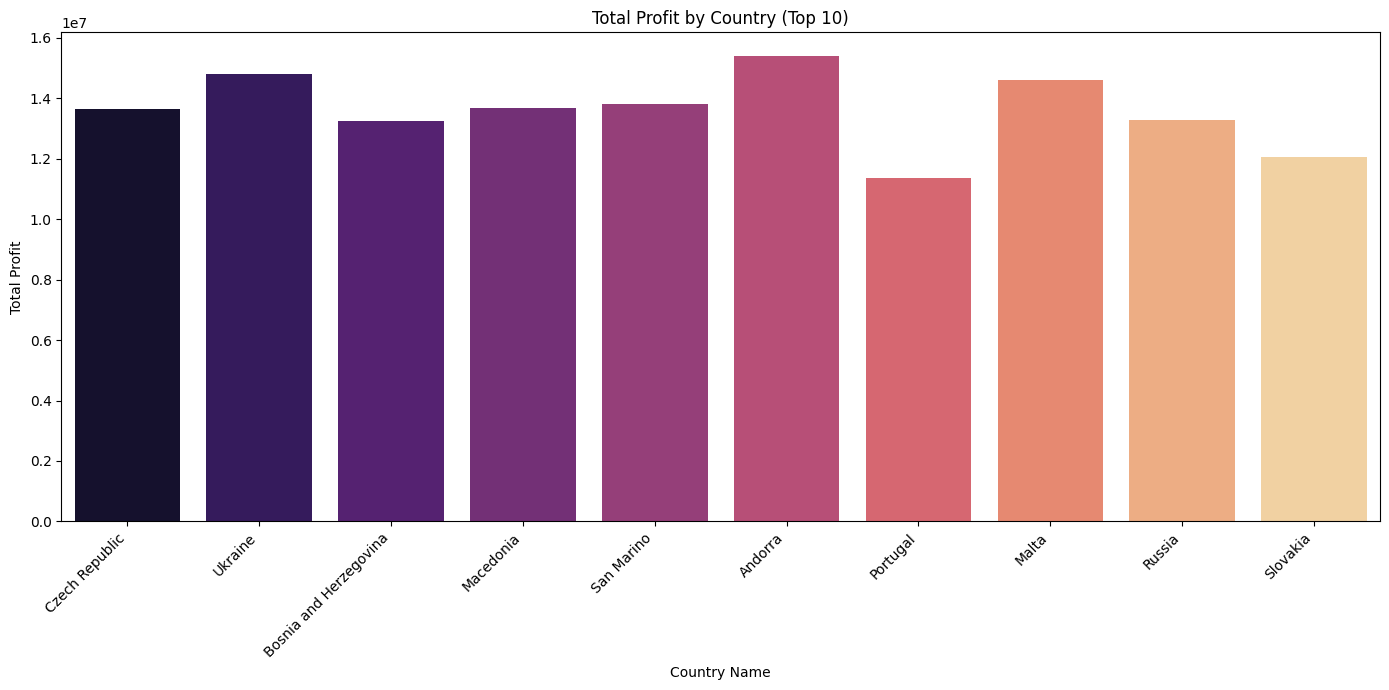

In [ ]:
print("Creating bar plot for Total Profit by Country (Top 10)...")
plt.figure(figsize=(14, 7))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10)['Profit'], hue=country_sales.head(10).index, palette='magma', legend=False)
plt.xlabel('Country Name')
plt.ylabel('Total Profit')
plt.title('Total Profit by Country (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the sales analysis by geography at the country level, I will now create a bar plot to visualize the 'Total Units Sold by Country (Top 10)', as instructed. I will use the `country_sales` DataFrame, set 'Country Name' on the x-axis and 'Units Sold' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Units Sold by Country (Top 10)...


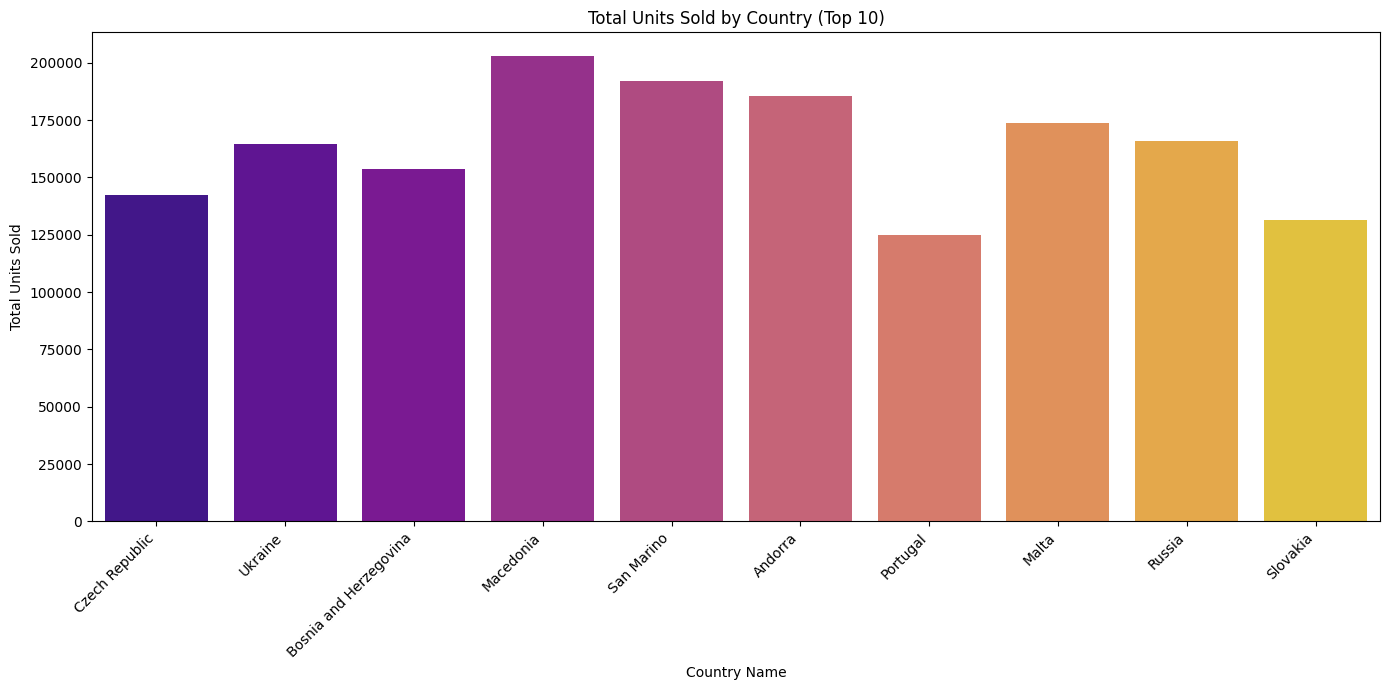

In [ ]:
print("Creating bar plot for Total Units Sold by Country (Top 10)...")
plt.figure(figsize=(14, 7))
sns.barplot(x=country_sales.head(10).index, y=country_sales.head(10)['Units Sold'], hue=country_sales.head(10).index, palette='plasma', legend=False)
plt.xlabel('Country Name')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Country (Top 10)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To continue the sales analysis by geography, I will now group the `df_merged` DataFrame by 'Region', calculate the sum of 'Revenue', 'Profit', and 'Units Sold', and then sort by 'Revenue' in descending order, excluding null values and 'Antarctica'.



In [ ]:
print("Aggregating sales data by Region...")
region_sales = df_merged[df_merged['Region'].notnull() & (df_merged['Region'] != 'Antarctica')].groupby('Region').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Revenue', ascending=False)

print("Aggregated Sales Data by Region:")
print(region_sales)

Aggregating sales data by Region...
Aggregated Sales Data by Region:
             Revenue        Profit  Units Sold
Region                                        
Europe  1.505653e+09  4.485568e+08   5761244.0
Asia    9.333089e+07  2.515225e+07    410427.0


**Reasoning**:
To visualize the total revenue by region, I will create a bar plot using the `region_sales` DataFrame, as instructed. I will set 'Region' on the x-axis and 'Revenue' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Revenue by Region...


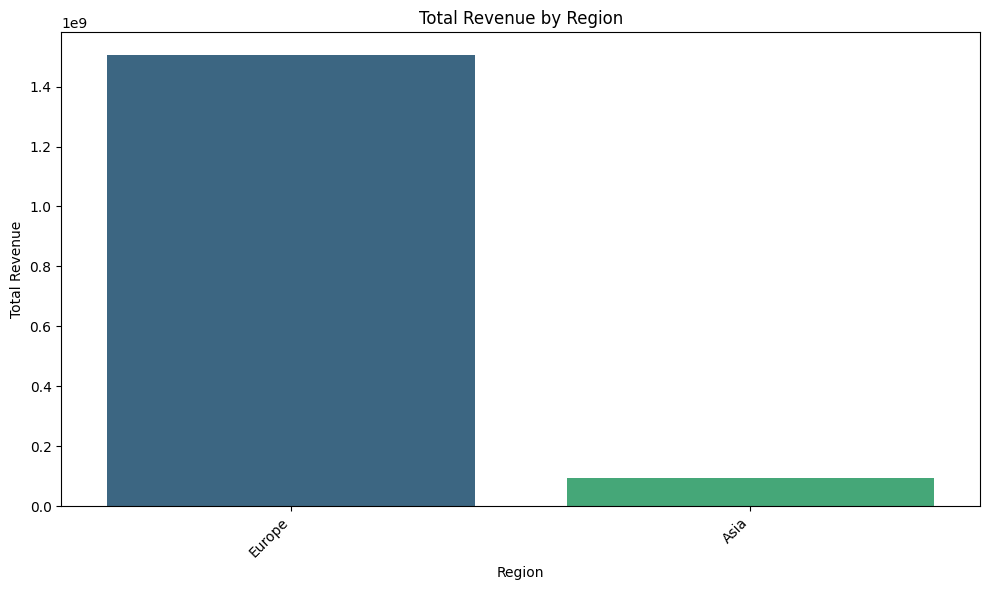

In [ ]:
print("Creating bar plot for Total Revenue by Region...")
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales['Revenue'], hue=region_sales.index, palette='viridis', legend=False)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the total profit by region, I will create a bar plot using the `region_sales` DataFrame. I will set 'Region' on the x-axis and 'Profit' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Profit by Region...


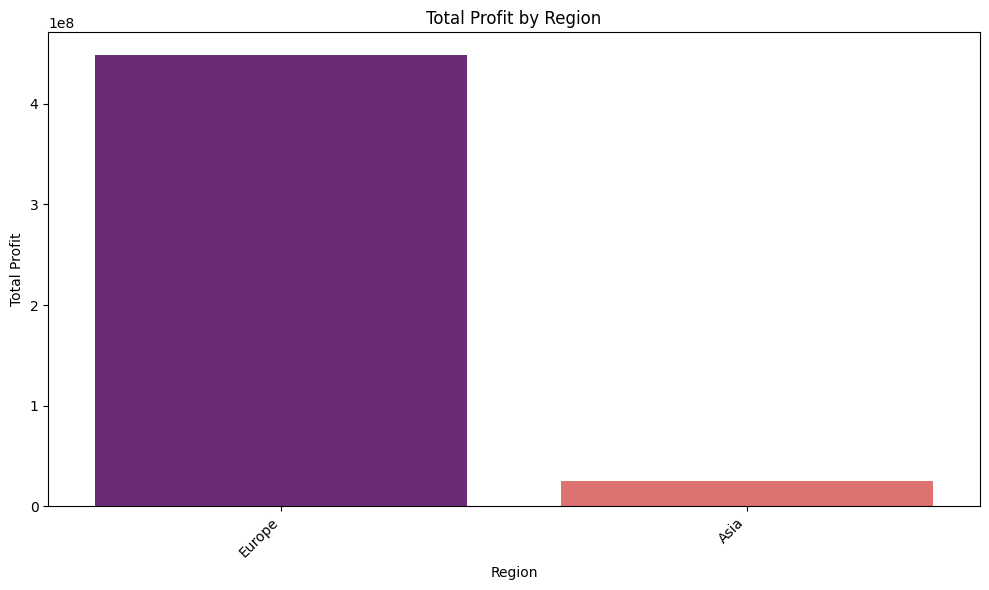

In [ ]:
print("Creating bar plot for Total Profit by Region...")
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales['Profit'], hue=region_sales.index, palette='magma', legend=False)
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.title('Total Profit by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the sales analysis by geography at the region level, I will now create a bar plot to visualize the 'Total Units Sold by Region', as instructed. I will use the `region_sales` DataFrame, set 'Region' on the x-axis and 'Units Sold' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Units Sold by Region...


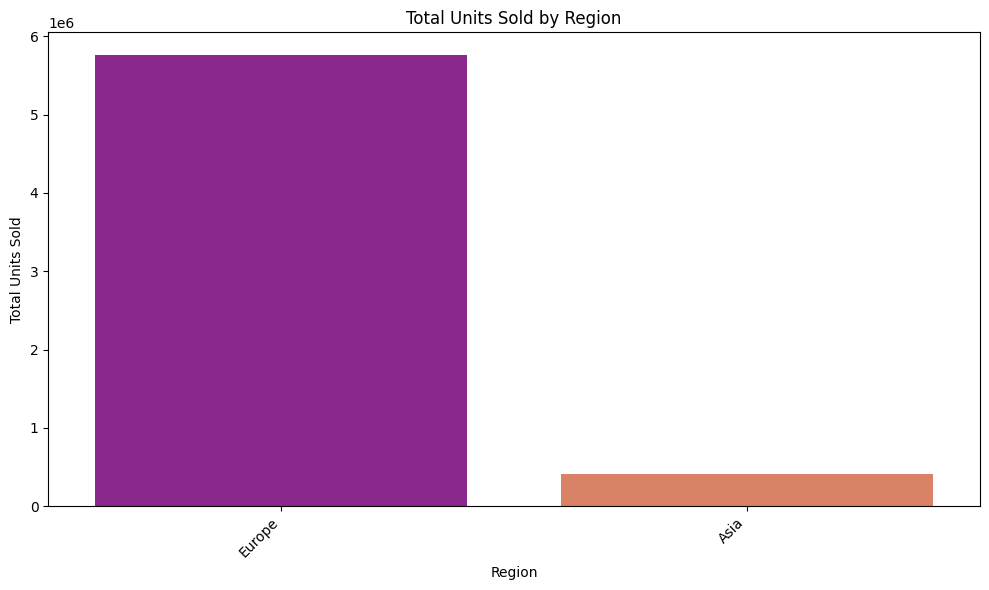

In [ ]:
print("Creating bar plot for Total Units Sold by Region...")
plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales['Units Sold'], hue=region_sales.index, palette='plasma', legend=False)
plt.xlabel('Region')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze sales by sales channels, I will group the `df_merged` DataFrame by 'Sales Channel' and calculate the sum of 'Revenue', 'Profit', and 'Units Sold' for each channel, as instructed. Then I will print the aggregated sales data.



In [ ]:
print("Aggregating sales data by Sales Channel...")
sales_channel_sales = df_merged.groupby('Sales Channel').agg({
    'Revenue': 'sum',
    'Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Revenue', ascending=False)

print("Aggregated Sales Data by Sales Channel:")
print(sales_channel_sales)

Aggregating sales data by Sales Channel...
Aggregated Sales Data by Sales Channel:
                    Revenue        Profit  Units Sold
Sales Channel                                        
Offline        8.717606e+08  2.534665e+08   3320363.0
Online         8.303688e+08  2.479679e+08   3256161.0


**Reasoning**:
To visualize the total revenue by sales channel, I will create a bar plot using the `sales_channel_sales` DataFrame. I will set 'Sales Channel' on the x-axis and 'Revenue' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Total Revenue by Sales Channel...


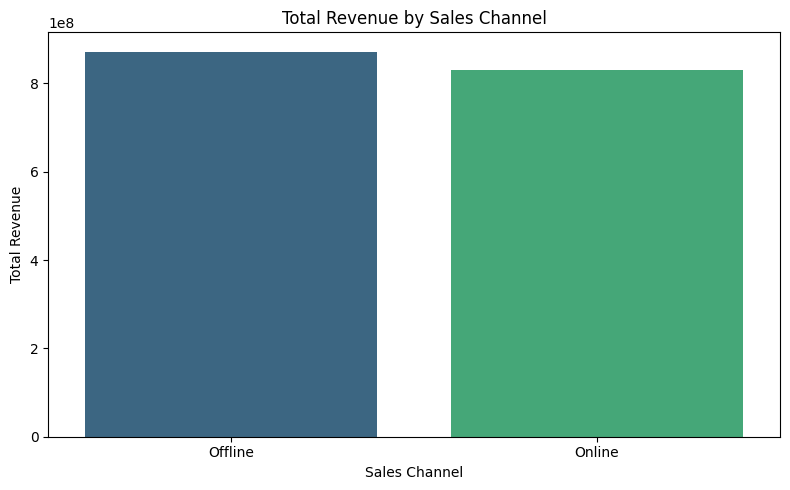

In [ ]:
print("Creating bar plot for Total Revenue by Sales Channel...")
plt.figure(figsize=(8, 5))
sns.barplot(x=sales_channel_sales.index, y=sales_channel_sales['Revenue'], hue=sales_channel_sales.index, palette='viridis', legend=False)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Sales Channel')
plt.tight_layout()
plt.show()

## Shipping Time Analysis

### Subtask:
Analyze the time interval between ordering and shipping, creating relevant visualizations by product categories, countries, and regions. Also, analyze if profit depends on shipping time.


**Reasoning**:
To begin the shipping time analysis, I will calculate the 'Shipping Duration' for each order by subtracting 'Order Date' from 'Ship Date' and store it in a new column in the `df_merged` DataFrame, as instructed.



In [ ]:
print("Calculating 'Shipping Duration'...")
df_merged['Shipping Duration'] = df_merged['Ship Date'] - df_merged['Order Date']

print("First 5 rows with 'Shipping Duration' column:")
print(df_merged[['Order Date', 'Ship Date', 'Shipping Duration']].head())

Calculating 'Shipping Duration'...
First 5 rows with 'Shipping Duration' column:
  Order Date  Ship Date Shipping Duration
0 2014-10-08 2014-10-18           10 days
1 2016-08-11 2016-08-11            0 days
2 2014-07-18 2014-08-11           24 days
3 2017-05-13 2017-06-13           31 days
4 2012-08-11 2012-09-18           38 days


**Reasoning**:
To proceed with the shipping time analysis, I will convert the 'Shipping Duration' from timedelta objects to numerical values representing days, as specified in instruction 2.



In [ ]:
print("Converting 'Shipping Duration' to numerical days...")
df_merged['Shipping Duration Days'] = df_merged['Shipping Duration'].dt.days

print("First 5 rows with 'Shipping Duration Days' column:")
print(df_merged[['Order Date', 'Ship Date', 'Shipping Duration', 'Shipping Duration Days']].head())

Converting 'Shipping Duration' to numerical days...
First 5 rows with 'Shipping Duration Days' column:
  Order Date  Ship Date Shipping Duration  Shipping Duration Days
0 2014-10-08 2014-10-18           10 days                      10
1 2016-08-11 2016-08-11            0 days                       0
2 2014-07-18 2014-08-11           24 days                      24
3 2017-05-13 2017-06-13           31 days                      31
4 2012-08-11 2012-09-18           38 days                      38


**Reasoning**:
To analyze shipping duration and profit by product category, I will group the `df_merged` DataFrame by 'Product Category' and calculate the average 'Shipping Duration Days' and total 'Profit' for each category, then print the results, as per instruction 3.



In [ ]:
print("Aggregating average shipping duration and total profit by Product Category...")
product_shipping_profit = df_merged.groupby('Product Category').agg({
    'Shipping Duration Days': 'mean',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)

print("Average Shipping Duration and Total Profit by Product Category:")
print(product_shipping_profit)

Aggregating average shipping duration and total profit by Product Category...
Average Shipping Duration and Total Profit by Product Category:
                  Shipping Duration Days       Profit
Product Category                                     
Cosmetics                      25.912281  92723306.17
Office Supplies                26.707317  77977176.25
Household                      23.938144  72962466.77
Baby Food                      26.339286  53940997.16
Clothes                        23.104762  43431314.40
Cereal                         27.184466  41255034.15
Vegetables                     23.491228  36776002.72
Meat                           25.909091  30337736.00
Snacks                         25.543689  27027422.40
Personal Care                  20.763158  13975410.68
Beverages                      24.123967   9601662.78
Fruits                         24.419643   1425929.52


**Reasoning**:
To visualize the average shipping duration by product category, I will create a bar plot using the `product_shipping_profit` DataFrame, as instructed in step 4. I will set 'Product Category' on the x-axis and 'Shipping Duration Days' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Average Shipping Duration by Product Category...


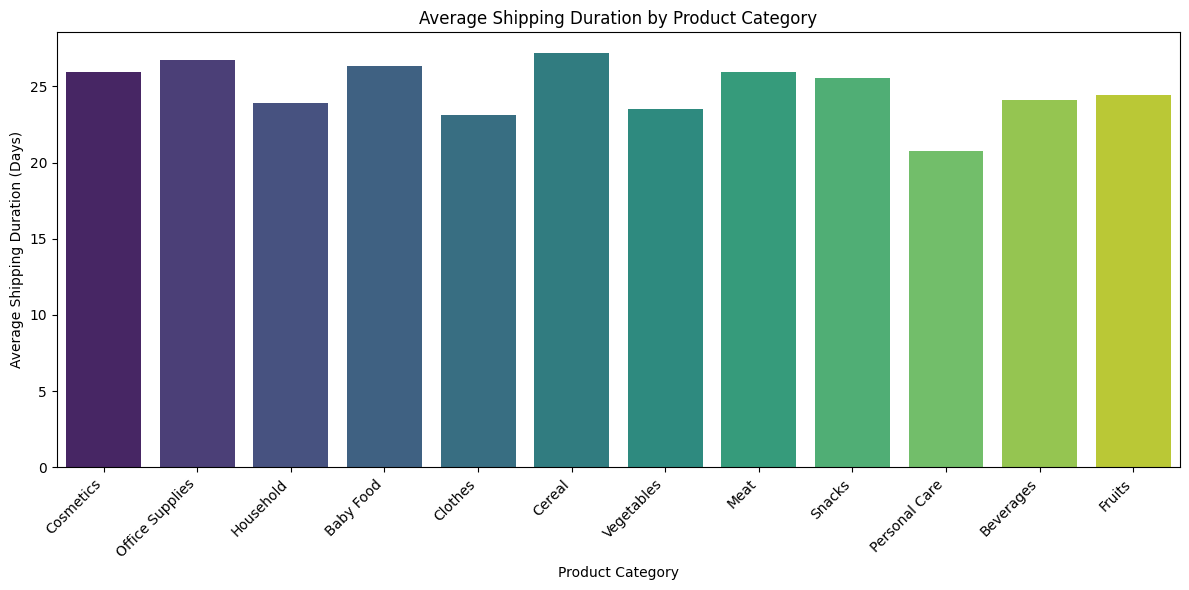

In [ ]:
print("Creating bar plot for Average Shipping Duration by Product Category...")
plt.figure(figsize=(12, 6))
sns.barplot(x=product_shipping_profit.index, y=product_shipping_profit['Shipping Duration Days'], hue=product_shipping_profit.index, palette='viridis', legend=False)
plt.xlabel('Product Category')
plt.ylabel('Average Shipping Duration (Days)')
plt.title('Average Shipping Duration by Product Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the relationship between 'Product Category', 'Profit', and 'Shipping Duration', as instructed in step 5, I will create a scatter plot using the `product_shipping_profit` DataFrame. 'Shipping Duration Days' will be on the x-axis, 'Profit' on the y-axis, and each point will represent a 'Product Category', with labels for clarity.



Creating scatter plot for Profit vs. Average Shipping Duration by Product Category...


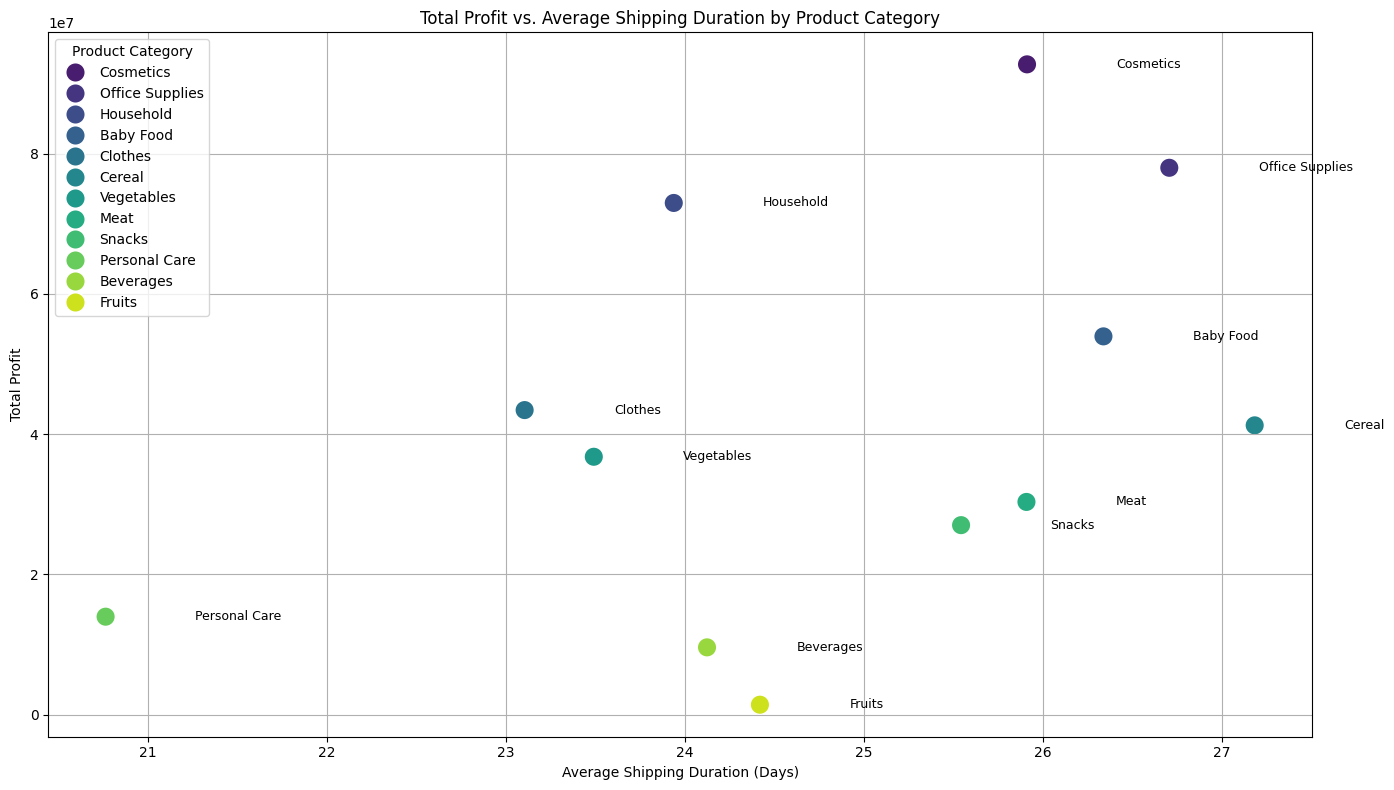

In [ ]:
print("Creating scatter plot for Profit vs. Average Shipping Duration by Product Category...")
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Shipping Duration Days', y='Profit', data=product_shipping_profit, hue=product_shipping_profit.index, s=200, palette='viridis', legend='full')

for i, row in product_shipping_profit.iterrows():
    plt.text(row['Shipping Duration Days'] + 0.5, row['Profit'], i, fontsize=9, ha='left', va='center')

plt.xlabel('Average Shipping Duration (Days)')
plt.ylabel('Total Profit')
plt.title('Total Profit vs. Average Shipping Duration by Product Category')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To continue the shipping time analysis, I will now group the `df_merged` DataFrame by 'Country Name', calculate the average 'Shipping Duration Days' and total 'Profit' for each country, excluding 'Unknown' or null values, and then sort by 'Profit' in descending order. Finally, I will print the results for the top 10 countries by profit, as instructed in step 6.



In [ ]:
print("Aggregating average shipping duration and total profit by Country Name (Top 10 by Profit)...")
country_shipping_profit = df_merged[df_merged['Country Name'].notnull() & (df_merged['Country Name'] != 'Unknown')].groupby('Country Name').agg({
    'Shipping Duration Days': 'mean',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)

print("Average Shipping Duration and Total Profit by Country Name (Top 10 by Profit):")
print(country_shipping_profit.head(10))

Aggregating average shipping duration and total profit by Country Name (Top 10 by Profit)...
Average Shipping Duration and Total Profit by Country Name (Top 10 by Profit):
                        Shipping Duration Days       Profit
Country Name                                               
Andorra                              26.275000  15410036.63
Ukraine                              25.757576  14804925.74
Malta                                21.562500  14610127.88
San Marino                           21.700000  13792992.81
Hungary                              32.640000  13786231.03
Macedonia                            23.218750  13684099.95
Czech Republic                       25.225806  13635593.78
Russia                               27.375000  13267682.64
Bosnia and Herzegovina               26.060606  13257602.77
Greece                               23.000000  12324450.13


**Reasoning**:
To visualize the average shipping duration for the top 10 countries, I will create a bar plot using the `country_shipping_profit` DataFrame, as instructed in step 7. I will set 'Country Name' on the x-axis and 'Shipping Duration Days' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Average Shipping Duration by Country (Top 10 by Profit)...


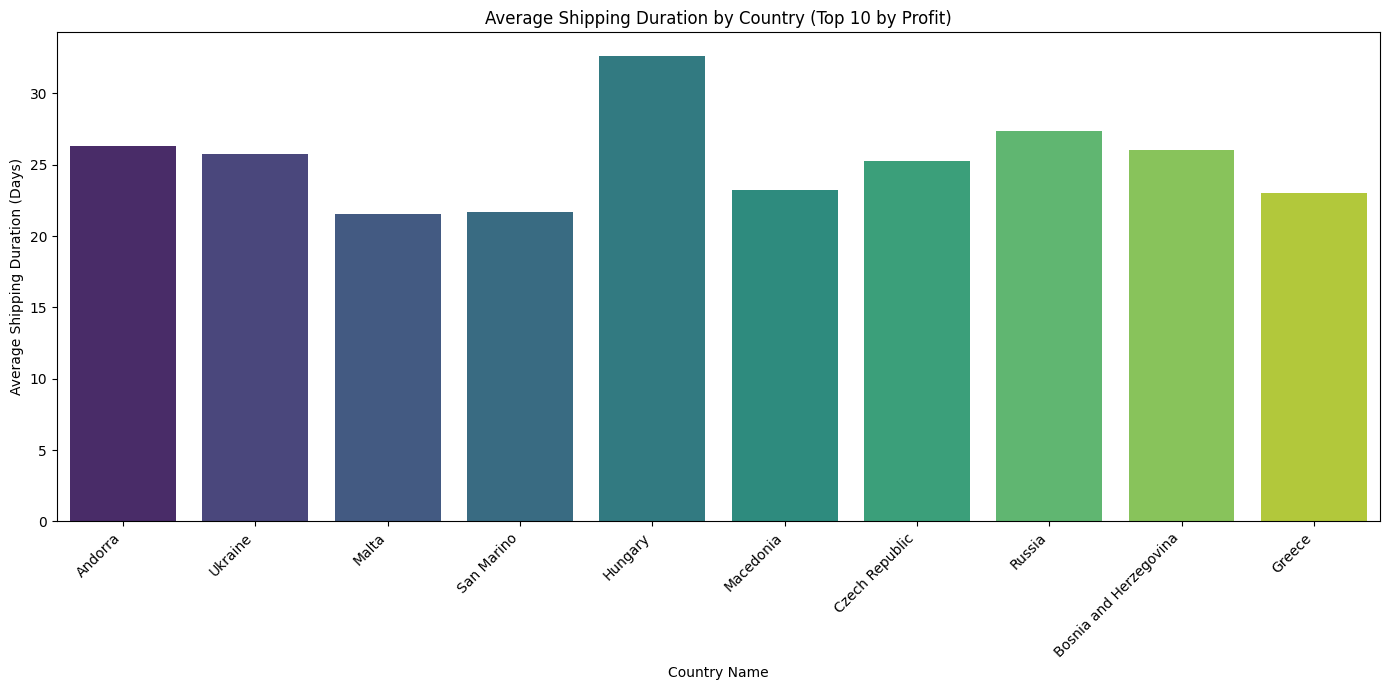

In [ ]:
print("Creating bar plot for Average Shipping Duration by Country (Top 10 by Profit)...")
plt.figure(figsize=(14, 7))
sns.barplot(x=country_shipping_profit.head(10).index, y=country_shipping_profit.head(10)['Shipping Duration Days'], hue=country_shipping_profit.head(10).index, palette='viridis', legend=False)
plt.xlabel('Country Name')
plt.ylabel('Average Shipping Duration (Days)')
plt.title('Average Shipping Duration by Country (Top 10 by Profit)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the relationship between 'Country Name' (top 10), 'Profit', and 'Shipping Duration', as instructed in step 8, I will create a scatter plot using the `country_shipping_profit` DataFrame. 'Shipping Duration Days' will be on the x-axis, 'Profit' on the y-axis, and each point will represent a country from the top 10 by profit, with labels for clarity.



Creating scatter plot for Profit vs. Average Shipping Duration by Country (Top 10 by Profit)...


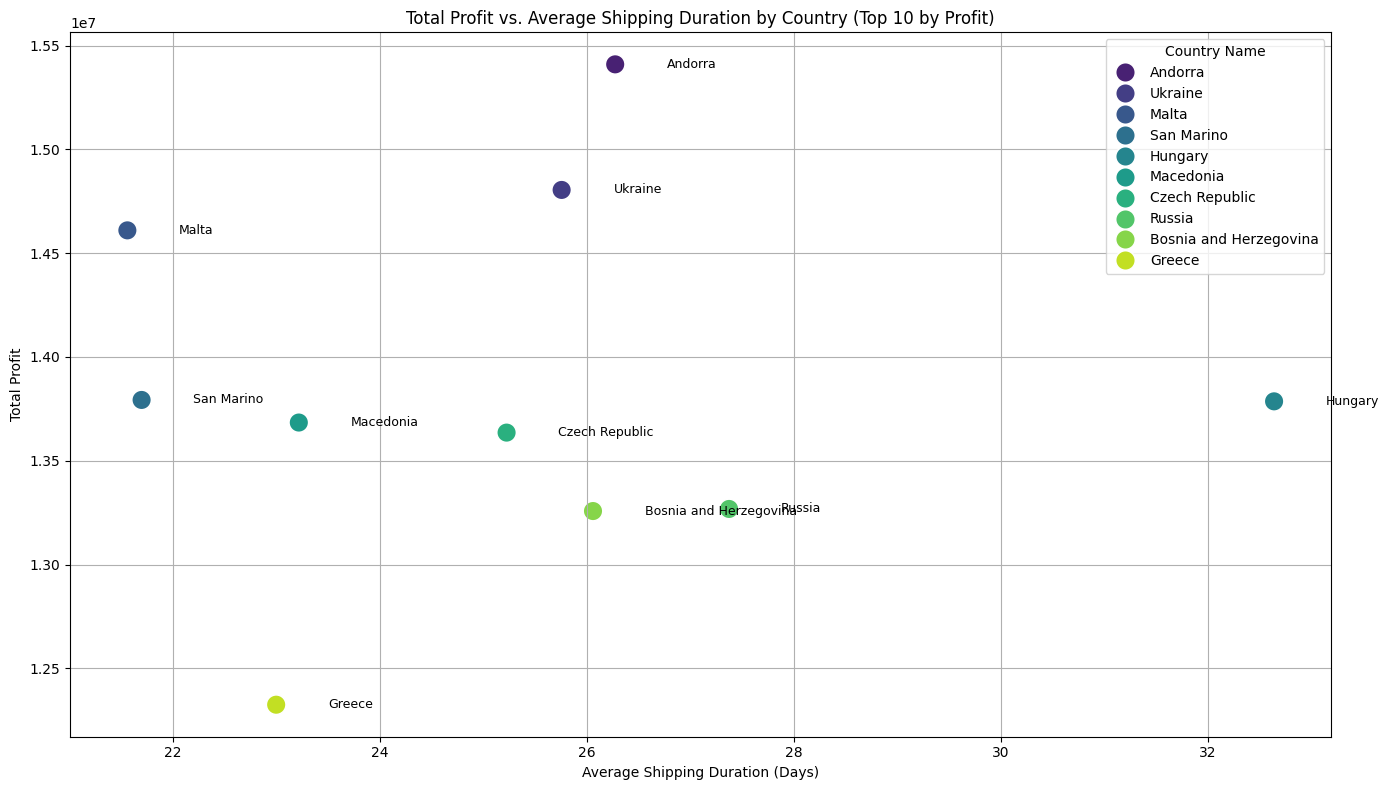

In [ ]:
print("Creating scatter plot for Profit vs. Average Shipping Duration by Country (Top 10 by Profit)...")
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Shipping Duration Days', y='Profit', data=country_shipping_profit.head(10), hue=country_shipping_profit.head(10).index, s=200, palette='viridis', legend='full')

for i, row in country_shipping_profit.head(10).iterrows():
    plt.text(row['Shipping Duration Days'] + 0.5, row['Profit'], i, fontsize=9, ha='left', va='center')

plt.xlabel('Average Shipping Duration (Days)')
plt.ylabel('Total Profit')
plt.title('Total Profit vs. Average Shipping Duration by Country (Top 10 by Profit)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To continue the shipping time analysis by region, I will group the `df_merged` DataFrame by 'Region', calculate the average 'Shipping Duration Days' and total 'Profit' for each region, excluding 'Antarctica' or null values, and then print the results, as instructed in step 9.



In [ ]:
print("Aggregating average shipping duration and total profit by Region...")
region_shipping_profit = df_merged[df_merged['Region'].notnull() & (df_merged['Region'] != 'Antarctica')].groupby('Region').agg({
    'Shipping Duration Days': 'mean',
    'Profit': 'sum'
}).sort_values(by='Profit', ascending=False)

print("Average Shipping Duration and Total Profit by Region:")
print(region_shipping_profit)

Aggregating average shipping duration and total profit by Region...
Average Shipping Duration and Total Profit by Region:
        Shipping Duration Days        Profit
Region                                      
Europe               24.790378  4.485568e+08
Asia                 26.085366  2.515225e+07


**Reasoning**:
To visualize the average shipping duration by region, I will create a bar plot using the `region_shipping_profit` DataFrame, as instructed in step 10. I will set 'Region' on the x-axis and 'Shipping Duration Days' on the y-axis, and add appropriate labels and a title.



Creating bar plot for Average Shipping Duration by Region...


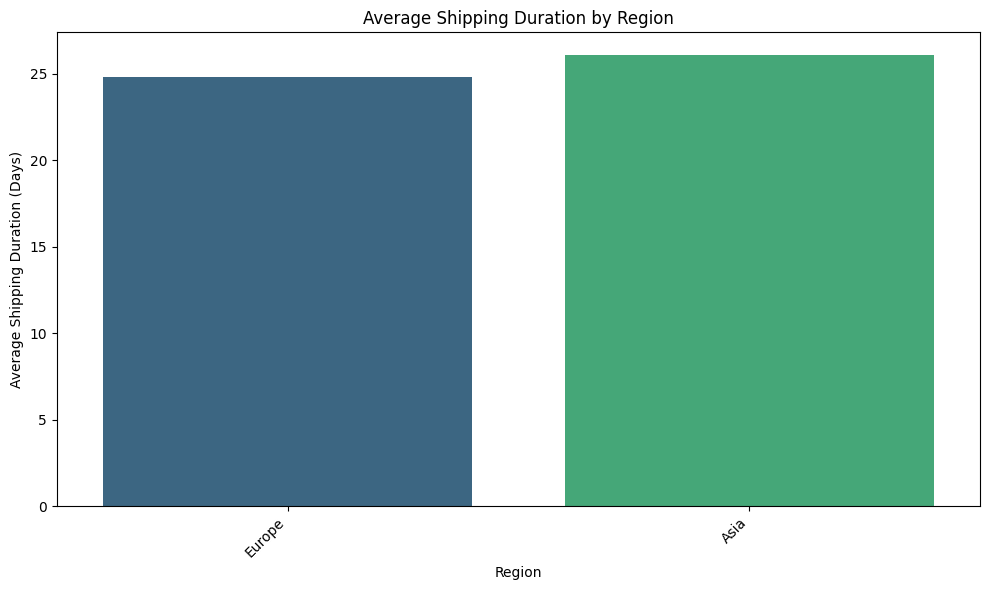

In [ ]:
print("Creating bar plot for Average Shipping Duration by Region...")
plt.figure(figsize=(10, 6))
sns.barplot(x=region_shipping_profit.index, y=region_shipping_profit['Shipping Duration Days'], hue=region_shipping_profit.index, palette='viridis', legend=False)
plt.xlabel('Region')
plt.ylabel('Average Shipping Duration (Days)')
plt.title('Average Shipping Duration by Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the relationship between 'Region', 'Profit', and 'Shipping Duration', as instructed in step 11, I will create a scatter plot using the `region_shipping_profit` DataFrame. 'Shipping Duration Days' will be on the x-axis, 'Profit' on the y-axis, and each point will represent a 'Region', with labels for clarity.



Creating scatter plot for Profit vs. Average Shipping Duration by Region...


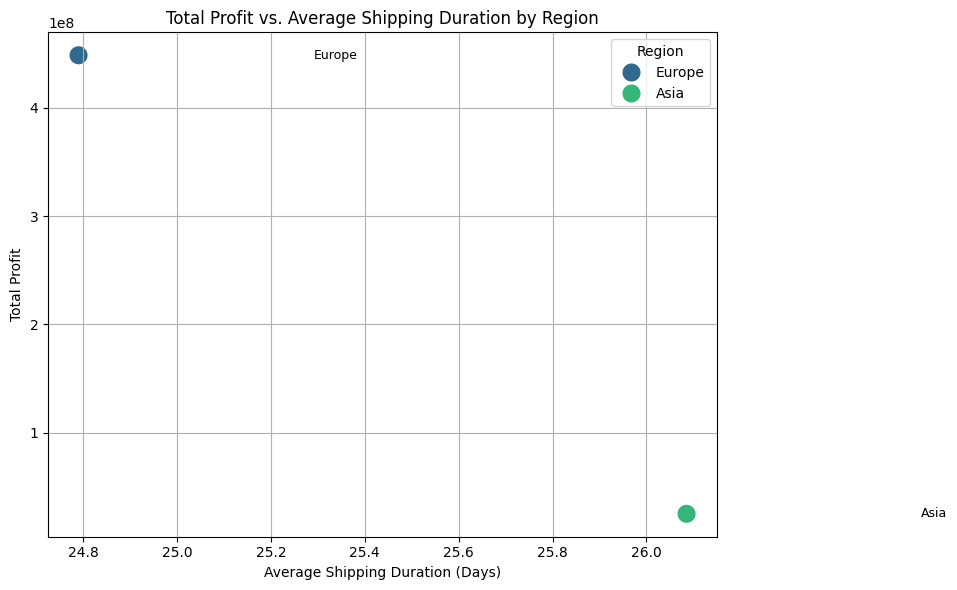

In [ ]:
print("Creating scatter plot for Profit vs. Average Shipping Duration by Region...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Shipping Duration Days', y='Profit', data=region_shipping_profit, hue=region_shipping_profit.index, s=200, palette='viridis', legend='full')

for i, row in region_shipping_profit.iterrows():
    plt.text(row['Shipping Duration Days'] + 0.5, row['Profit'], i, fontsize=9, ha='left', va='center')

plt.xlabel('Average Shipping Duration (Days)')
plt.ylabel('Total Profit')
plt.title('Total Profit vs. Average Shipping Duration by Region')
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To complete the shipping time analysis as per instruction 12, I will create a scatter plot to visualize the overall relationship between 'Shipping Duration Days' and 'Profit' across all orders in `df_merged`. I will add appropriate labels and a title to the plot.



Creating overall scatter plot for Profit vs. Shipping Duration...


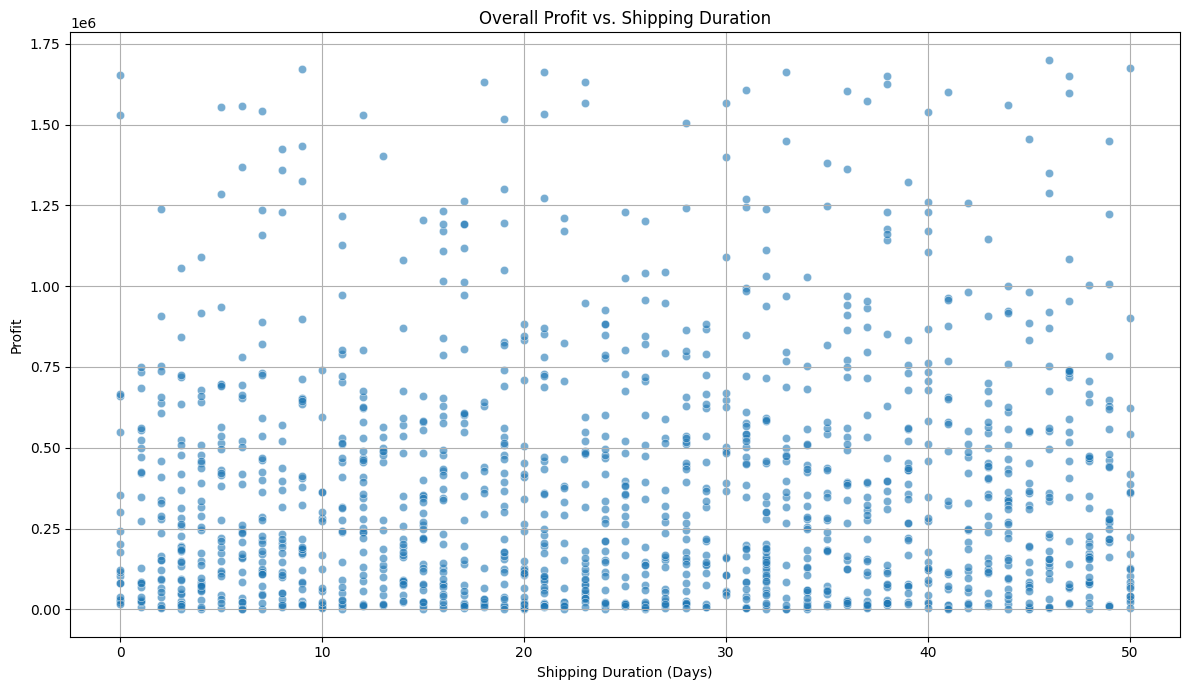

In [ ]:
print("Creating overall scatter plot for Profit vs. Shipping Duration...")
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Shipping Duration Days', y='Profit', data=df_merged, alpha=0.6)
plt.xlabel('Shipping Duration (Days)')
plt.ylabel('Profit')
plt.title('Overall Profit vs. Shipping Duration')
plt.grid(True)
plt.tight_layout()
plt.show()

## Sales Dynamics Over Time

### Subtask:
Analyze sales dynamics over time using visualizations by product categories, countries, and regions to identify main trends.


**Reasoning**:
To analyze sales dynamics over time, I will first extract the 'Order Year' and the full 'Order Month' name from the 'Order Date' column in the `df_merged` DataFrame, storing them in new respective columns as per the instructions.



In [ ]:
print("Extracting 'Order Year' and 'Order Month' from 'Order Date'...")
df_merged['Order Year'] = df_merged['Order Date'].dt.year
df_merged['Order Month'] = df_merged['Order Date'].dt.strftime('%B')

print("First 5 rows with new 'Order Year' and 'Order Month' columns:")
print(df_merged[['Order Date', 'Order Year', 'Order Month']].head())

Extracting 'Order Year' and 'Order Month' from 'Order Date'...
First 5 rows with new 'Order Year' and 'Order Month' columns:
  Order Date  Order Year Order Month
0 2014-10-08        2014     October
1 2016-08-11        2016      August
2 2014-07-18        2014        July
3 2017-05-13        2017         May
4 2012-08-11        2012      August


**Reasoning**:
To analyze sales dynamics over time, I will group the `df_merged` DataFrame by 'Order Year' and 'Order Month', calculate the sum of 'Revenue' and 'Profit' for each period, and store it in `time_series_sales`. To ensure chronological sorting of months, I'll first add a numerical month column, sort, and then drop the numerical month column.



In [ ]:
print("Aggregating sales data by 'Order Year' and 'Order Month'...")
time_series_sales = df_merged.copy()
time_series_sales['Order Month Num'] = time_series_sales['Order Date'].dt.month

time_series_sales = time_series_sales.groupby(['Order Year', 'Order Month', 'Order Month Num']).agg({
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

time_series_sales = time_series_sales.sort_values(by=['Order Year', 'Order Month Num'])
time_series_sales.drop(columns=['Order Month Num'], inplace=True)

print("Aggregated Sales Data by Order Year and Order Month (first 5 rows):")
print(time_series_sales.head())

Aggregating sales data by 'Order Year' and 'Order Month'...
Aggregated Sales Data by Order Year and Order Month (first 5 rows):
   Order Year Order Month      Revenue      Profit
4        2010     January  21115354.48  8567689.01
3        2010    February  19853023.20  4306485.07
7        2010       March   8474747.19  3093055.70
0        2010       April  10058016.05  2320389.85
8        2010         May  20304725.59  6655673.86


**Reasoning**:
To visualize the overall trend of revenue over time, I will create a line plot using the `time_series_sales` DataFrame. I will combine 'Order Year' and 'Order Month' for a comprehensive x-axis and plot 'Revenue' on the y-axis, as instructed.



Creating line plot for Total Revenue Over Time...


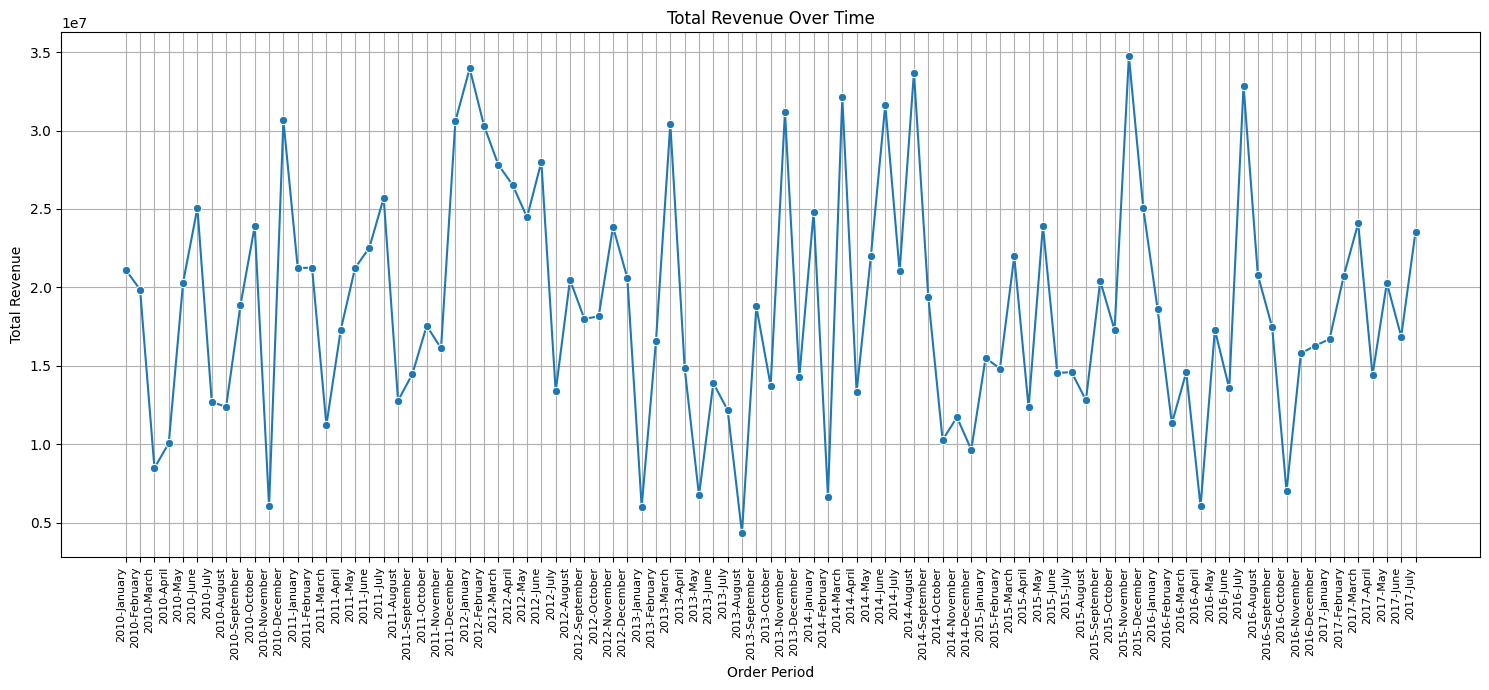

In [ ]:
print("Creating line plot for Total Revenue Over Time...")
plt.figure(figsize=(15, 7))
sns.lineplot(x=time_series_sales['Order Year'].astype(str) + '-' + time_series_sales['Order Month'], y=time_series_sales['Revenue'], marker='o')
plt.xlabel('Order Period')
plt.ylabel('Total Revenue')
plt.title('Total Revenue Over Time')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the overall trend of profit over time, I will create a line plot using the `time_series_sales` DataFrame. I will combine 'Order Year' and 'Order Month' for a comprehensive x-axis and plot 'Profit' on the y-axis, as instructed.



Creating line plot for Total Profit Over Time...


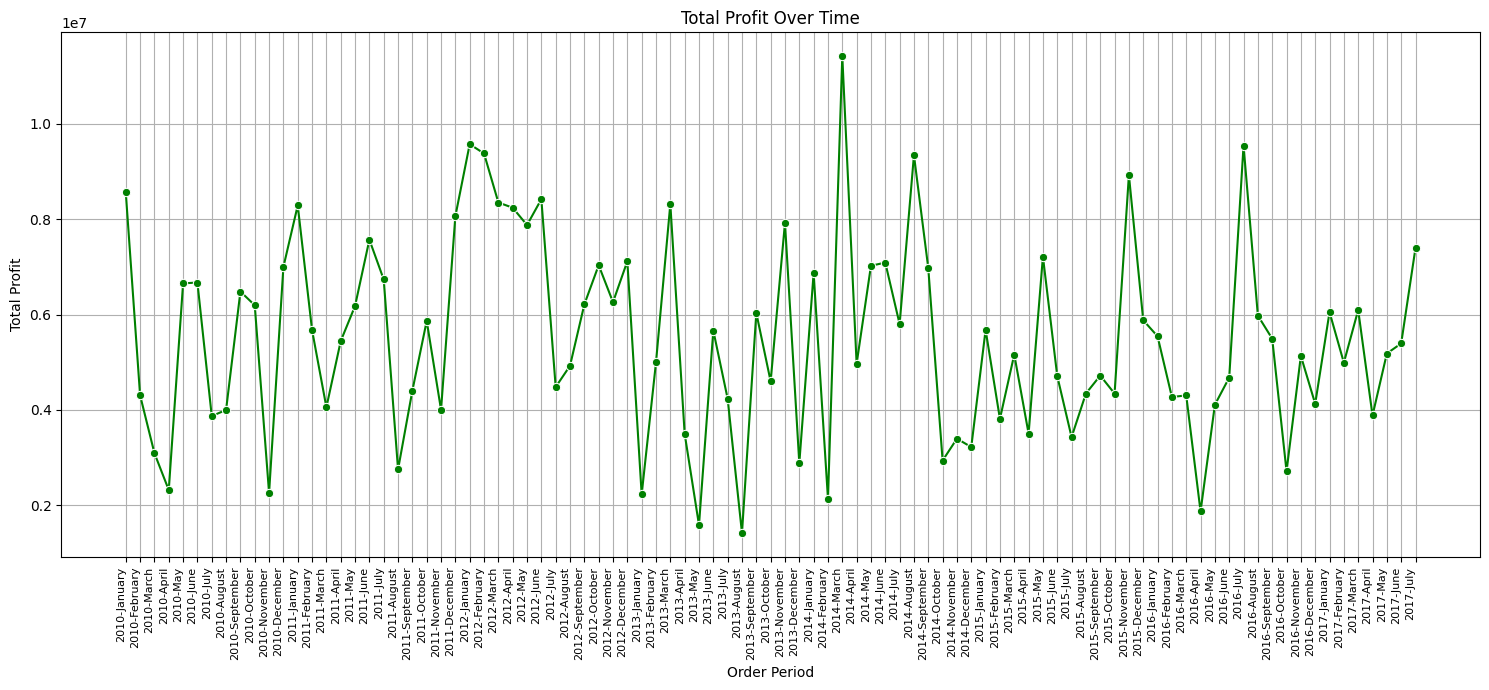

In [ ]:
print("Creating line plot for Total Profit Over Time...")
plt.figure(figsize=(15, 7))
sns.lineplot(x=time_series_sales['Order Year'].astype(str) + '-' + time_series_sales['Order Month'], y=time_series_sales['Profit'], marker='o', color='green')
plt.xlabel('Order Period')
plt.ylabel('Total Profit')
plt.title('Total Profit Over Time')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze sales dynamics by product category over time, I will group the `df_merged` DataFrame by 'Order Year', 'Order Month', and 'Product Category' and calculate the sum of 'Revenue', then store this in a new DataFrame called `product_category_time_series` as instructed.



In [ ]:
print("Aggregating sales data by 'Order Year', 'Order Month', and 'Product Category'...")
product_category_time_series = df_merged.copy()
product_category_time_series['Order Month Num'] = product_category_time_series['Order Date'].dt.month

product_category_time_series = product_category_time_series.groupby(['Order Year', 'Order Month', 'Order Month Num', 'Product Category']).agg({
    'Revenue': 'sum'
}).reset_index()

product_category_time_series = product_category_time_series.sort_values(by=['Order Year', 'Order Month Num', 'Product Category'])
product_category_time_series.drop(columns=['Order Month Num'], inplace=True)

print("Aggregated Sales Data by Product Category Over Time (first 5 rows):")
print(product_category_time_series.head())

Aggregating sales data by 'Order Year', 'Order Month', and 'Product Category'...
Aggregated Sales Data by Product Category Over Time (first 5 rows):
    Order Year Order Month Product Category     Revenue
34        2010     January        Baby Food  4149321.12
35        2010     January        Beverages   315352.70
36        2010     January           Cereal  4828601.80
37        2010     January          Clothes  1100012.48
38        2010     January        Cosmetics  5452321.20


**Reasoning**:
To visualize the 'Revenue Over Time by Product Category', I will iterate through each unique product category in the `product_category_time_series` DataFrame and create a line plot for each, showing its revenue over time. I will ensure different colors are used for each category and add appropriate labels and a title to the plot.



Creating line plot for Revenue Over Time by Product Category...


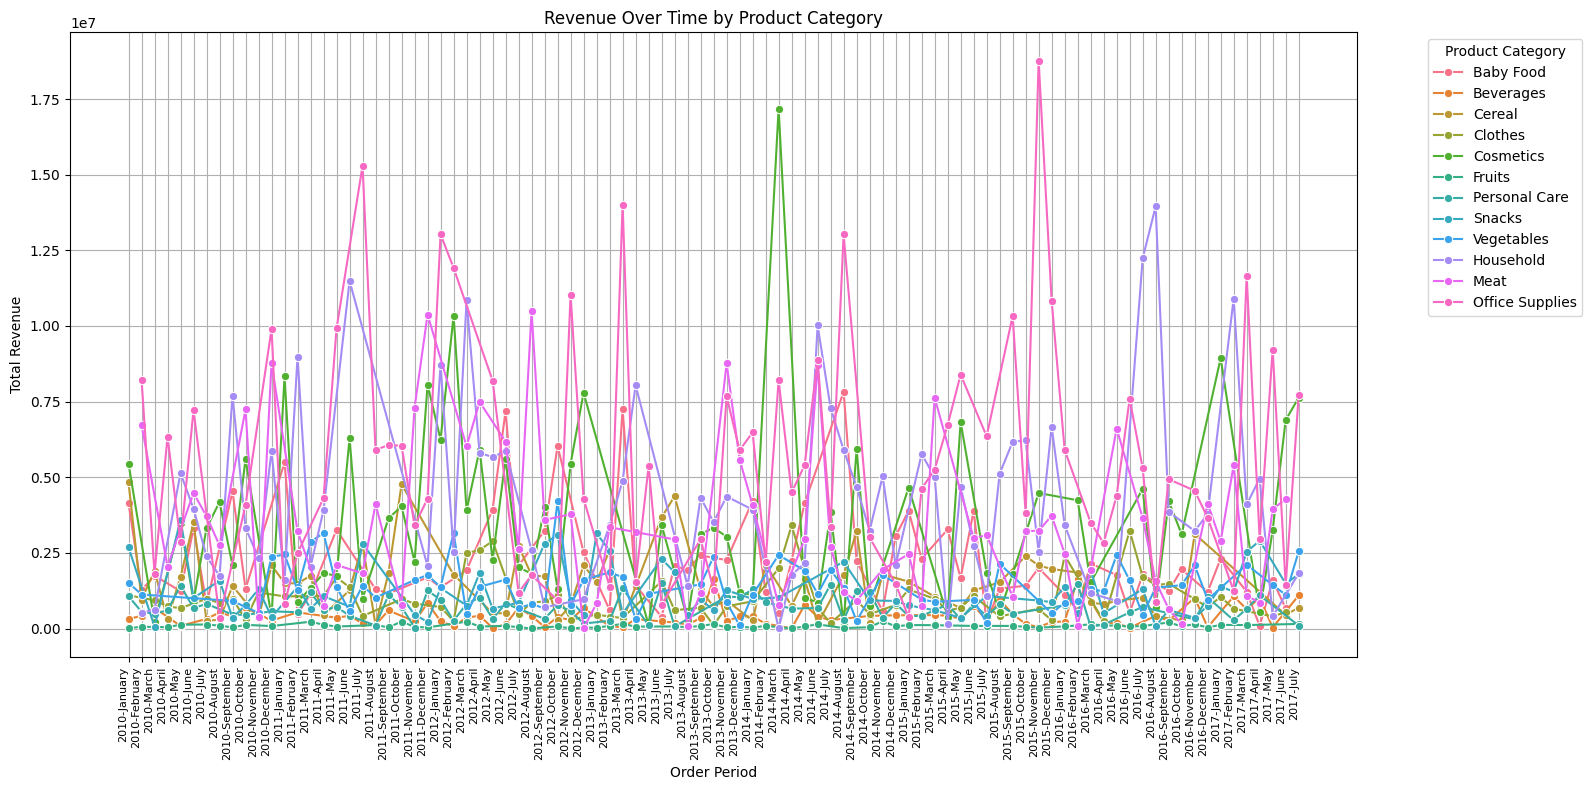

In [ ]:
print("Creating line plot for Revenue Over Time by Product Category...")
plt.figure(figsize=(16, 8))

# Combine 'Order Year' and 'Order Month' for a comprehensive x-axis
product_category_time_series['Order Period'] = product_category_time_series['Order Year'].astype(str) + '-' + product_category_time_series['Order Month']

# Plot each product category's revenue over time
sns.lineplot(data=product_category_time_series, x='Order Period', y='Revenue', hue='Product Category', marker='o')

plt.xlabel('Order Period')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Time by Product Category')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze sales dynamics by country over time, I will first identify the top 5 countries by total profit from the `country_shipping_profit` DataFrame. Then, I will filter the `df_merged` DataFrame to include only these top countries, group the filtered data by 'Order Year', 'Order Month', and 'Country Name', and calculate the sum of 'Revenue'. Finally, I will store this aggregated data in a new DataFrame called `country_time_series_sales`.



In [ ]:
print("Aggregating sales data by 'Order Year', 'Order Month', and 'Country Name' for top 5 countries...")

top_5_countries = country_shipping_profit.head(5).index.tolist()

country_time_series_sales = df_merged[df_merged['Country Name'].isin(top_5_countries)].copy()
country_time_series_sales['Order Month Num'] = country_time_series_sales['Order Date'].dt.month

country_time_series_sales = country_time_series_sales.groupby(['Order Year', 'Order Month', 'Order Month Num', 'Country Name']).agg({
    'Revenue': 'sum'
}).reset_index()

country_time_series_sales = country_time_series_sales.sort_values(by=['Order Year', 'Order Month Num', 'Country Name'])
country_time_series_sales.drop(columns=['Order Month Num'], inplace=True)

print("Aggregated Sales Data by Country Name Over Time (first 5 rows):")
print(country_time_series_sales.head())

Aggregating sales data by 'Order Year', 'Order Month', and 'Country Name' for top 5 countries...
Aggregated Sales Data by Country Name Over Time (first 5 rows):
    Order Year Order Month Country Name     Revenue
3         2010     January      Andorra  1440093.59
4         2010     January      Hungary  2391207.76
2         2010    February        Malta    59236.17
9         2010       March      Andorra  1908484.60
10        2010       March        Malta  1744328.24


**Reasoning**:
To visualize the 'Revenue Over Time by Country' for the top 5 countries, I will create a line plot using the `country_time_series_sales` DataFrame, as instructed. Each line in the plot will represent a different country, and I will add appropriate labels and a title.



Creating line plot for Revenue Over Time by Country (Top 5 Countries)...


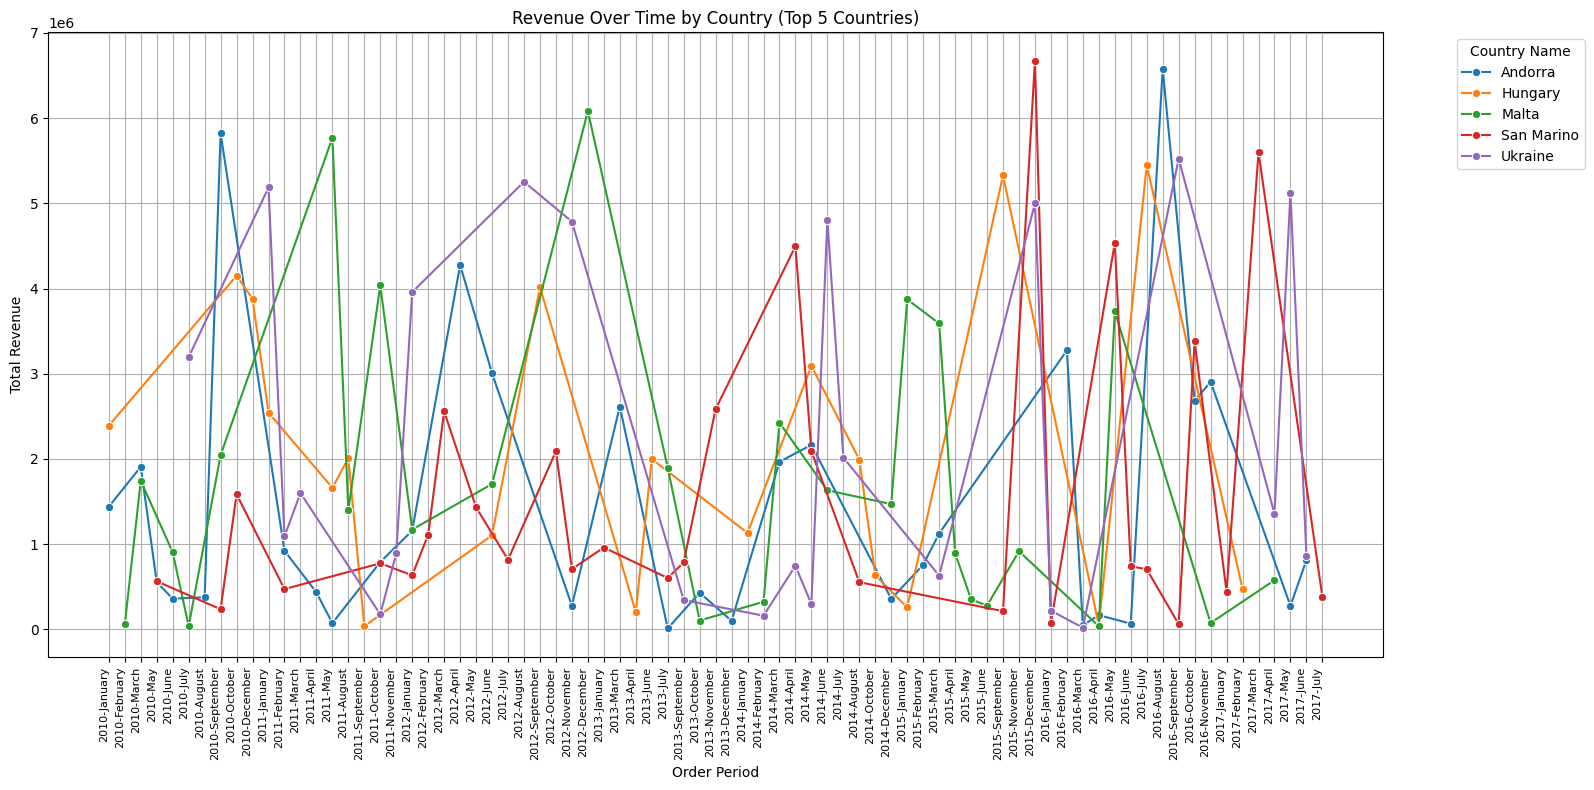

In [ ]:
print("Creating line plot for Revenue Over Time by Country (Top 5 Countries)...")
plt.figure(figsize=(16, 8))

# Combine 'Order Year' and 'Order Month' for a comprehensive x-axis
country_time_series_sales['Order Period'] = country_time_series_sales['Order Year'].astype(str) + '-' + country_time_series_sales['Order Month']

# Plot each country's revenue over time
sns.lineplot(data=country_time_series_sales, x='Order Period', y='Revenue', hue='Country Name', marker='o')

plt.xlabel('Order Period')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Time by Country (Top 5 Countries)')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True)
plt.legend(title='Country Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Reasoning**:
To analyze sales dynamics by region over time, I will group the `df_merged` DataFrame by 'Order Year', 'Order Month', and 'Region' (excluding 'Antarctica' and null regions) and calculate the sum of 'Revenue'. I will store this aggregated data in a new DataFrame called `region_time_series_sales` as instructed.



In [ ]:
print("Aggregating sales data by 'Order Year', 'Order Month', and 'Region'...")

region_time_series_sales = df_merged[df_merged['Region'].notnull() & (df_merged['Region'] != 'Antarctica')].copy()
region_time_series_sales['Order Month Num'] = region_time_series_sales['Order Date'].dt.month

region_time_series_sales = region_time_series_sales.groupby(['Order Year', 'Order Month', 'Order Month Num', 'Region']).agg({
    'Revenue': 'sum'
}).reset_index()

region_time_series_sales = region_time_series_sales.sort_values(by=['Order Year', 'Order Month Num', 'Region'])
region_time_series_sales.drop(columns=['Order Month Num'], inplace=True)

print("Aggregated Sales Data by Region Over Time (first 5 rows):")
print(region_time_series_sales.head())

Aggregating sales data by 'Order Year', 'Order Month', and 'Region'...
Aggregated Sales Data by Region Over Time (first 5 rows):
    Order Year Order Month  Region      Revenue
6         2010     January    Asia   2024251.93
7         2010     January  Europe  18413854.79
4         2010    February    Asia   4822686.48
5         2010    February  Europe  15030336.72
10        2010       March  Europe   8474747.19


**Reasoning**:
To visualize the 'Revenue Over Time by Region', I will create a line plot using the `region_time_series_sales` DataFrame, as instructed. Each line in the plot will represent a different 'Region', and I will add appropriate labels and a title.



Creating line plot for Revenue Over Time by Region...


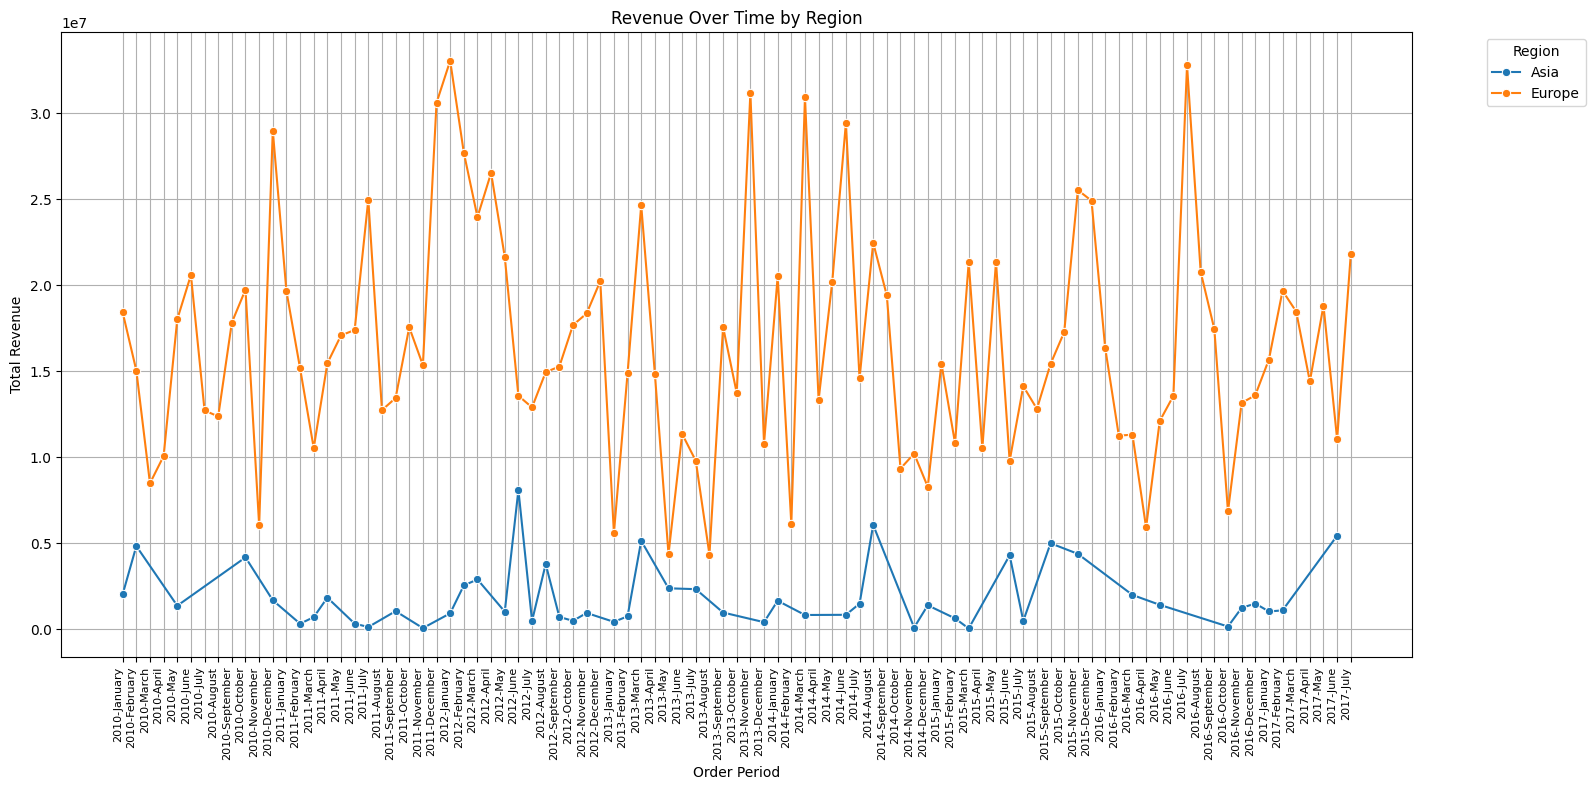

In [ ]:
print("Creating line plot for Revenue Over Time by Region...")
plt.figure(figsize=(16, 8))

# Combine 'Order Year' and 'Order Month' for a comprehensive x-axis
region_time_series_sales['Order Period'] = region_time_series_sales['Order Year'].astype(str) + '-' + region_time_series_sales['Order Month']

# Plot each region's revenue over time
sns.lineplot(data=region_time_series_sales, x='Order Period', y='Revenue', hue='Region', marker='o')

plt.xlabel('Order Period')
plt.ylabel('Total Revenue')
plt.title('Revenue Over Time by Region')
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.grid(True)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Seasonal Sales Analysis

### Subtask:
Analyze product sales by days of the week and determine if any products show seasonality, using the `day_name()` method.


**Reasoning**:
To begin the seasonal sales analysis, I will extract the day of the week from the 'Order Date' column in the `df_merged` DataFrame and store it in a new column called 'Order Day of Week', as instructed.



In [ ]:
print("Extracting 'Order Day of Week' from 'Order Date'...")
df_merged['Order Day of Week'] = df_merged['Order Date'].dt.day_name()

print("First 5 rows with new 'Order Day of Week' column:")
print(df_merged[['Order Date', 'Order Day of Week']].head())

Extracting 'Order Day of Week' from 'Order Date'...
First 5 rows with new 'Order Day of Week' column:
  Order Date Order Day of Week
0 2014-10-08         Wednesday
1 2016-08-11          Thursday
2 2014-07-18            Friday
3 2017-05-13          Saturday
4 2012-08-11          Saturday


**Reasoning**:
To analyze product sales by day of the week and product category, I will group the `df_merged` DataFrame by 'Order Day of Week' and 'Product Category', and then calculate the sum of 'Units Sold', 'Revenue', and 'Profit' for each group, storing the result in `daily_product_sales`, as instructed.



In [ ]:
print("Aggregating sales data by 'Order Day of Week' and 'Product Category'...")
daily_product_sales = df_merged.groupby(['Order Day of Week', 'Product Category']).agg({
    'Units Sold': 'sum',
    'Revenue': 'sum',
    'Profit': 'sum'
}).reset_index()

print("Aggregated Sales Data by Day of Week and Product Category (first 5 rows):")
print(daily_product_sales.head())

Aggregating sales data by 'Order Day of Week' and 'Product Category'...
Aggregated Sales Data by Day of Week and Product Category (first 5 rows):
  Order Day of Week Product Category  Units Sold      Revenue       Profit
0            Friday        Baby Food     79129.0  20200051.12   7585305.94
1            Friday        Beverages     67500.0   3202875.00   1057050.00
2            Friday           Cereal     62637.0  12884430.90   5549011.83
3            Friday          Clothes     61274.0   6696022.72   4499962.56
4            Friday        Cosmetics    141526.0  61875167.20  24607125.62


**Reasoning**:
To visualize 'Total Revenue by Day of Week', I will first aggregate the `df_merged` DataFrame by 'Order Day of Week' and sum the 'Revenue' to get the total revenue for each day. Then, I will ensure the days are plotted in a meaningful order (Monday to Sunday) and create a bar plot, as instructed.



Creating bar plot for Total Revenue by Day of Week...


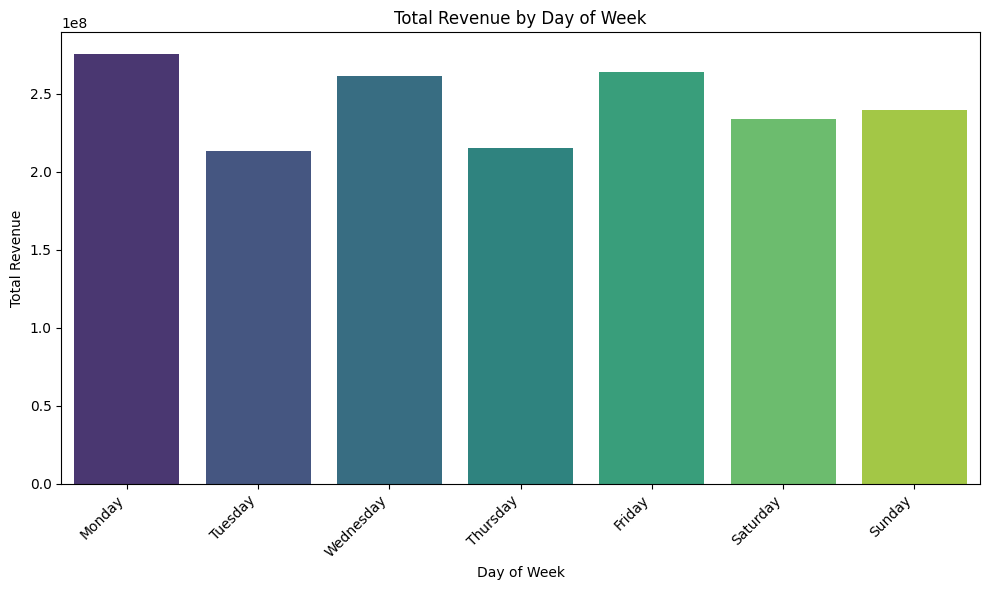

In [ ]:
print("Creating bar plot for Total Revenue by Day of Week...")

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

daily_revenue = df_merged.groupby('Order Day of Week')['Revenue'].sum().reindex(day_order)

plt.figure(figsize=(10, 6))
sns.barplot(x=daily_revenue.index, y=daily_revenue.values, palette='viridis', hue=daily_revenue.index, legend=False)
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Day of Week')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize 'Total Revenue by Product Category and Day of Week', I will create a grouped bar plot using the `daily_product_sales` DataFrame. I will set 'Order Day of Week' on the x-axis, 'Total Revenue' on the y-axis, and use 'Product Category' as the hue to differentiate categories, adding appropriate labels and a title.



Creating grouped bar plot for Total Revenue by Product Category and Day of Week...


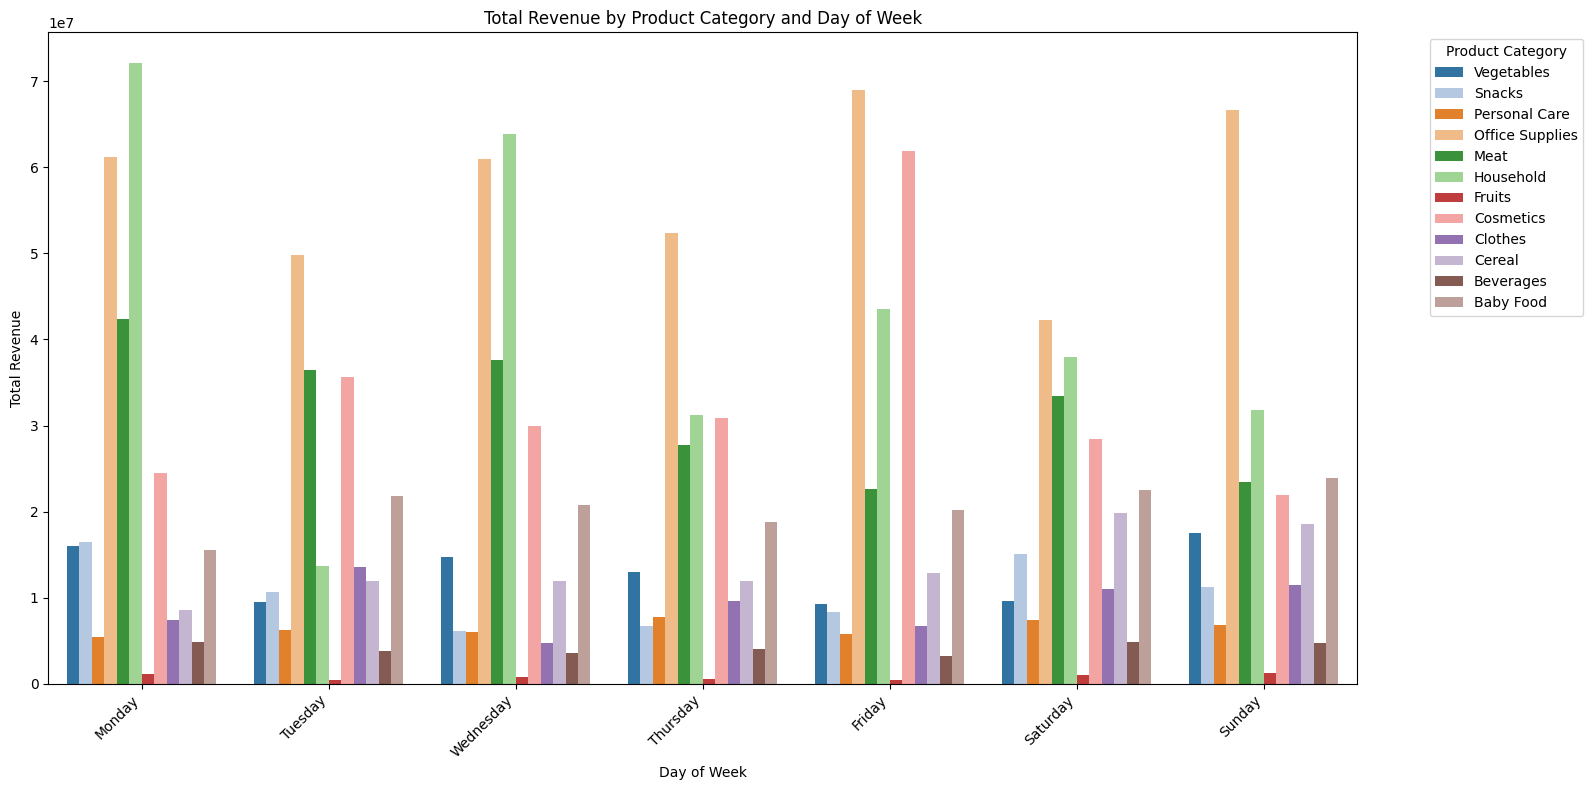

In [ ]:
print("Creating grouped bar plot for Total Revenue by Product Category and Day of Week...")

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_product_sales['Order Day of Week'] = pd.Categorical(daily_product_sales['Order Day of Week'], categories=day_order, ordered=True)

plt.figure(figsize=(16, 8))
sns.barplot(data=daily_product_sales.sort_values(by='Order Day of Week'), x='Order Day of Week', y='Revenue', hue='Product Category', palette='tab20')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product Category and Day of Week')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Reasoning**:
To visualize the average daily profit for each product category as a heatmap, I will pivot the `daily_product_sales` DataFrame to reshape it for the heatmap, ensuring the days of the week are ordered correctly, and then generate the heatmap using seaborn.



Creating heatmap for Average Daily Profit by Product Category...


/tmp/ipython-input-3538465748.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = daily_product_avg_profit.pivot_table(index='Order Day of Week', columns='Product Category', values='Profit')


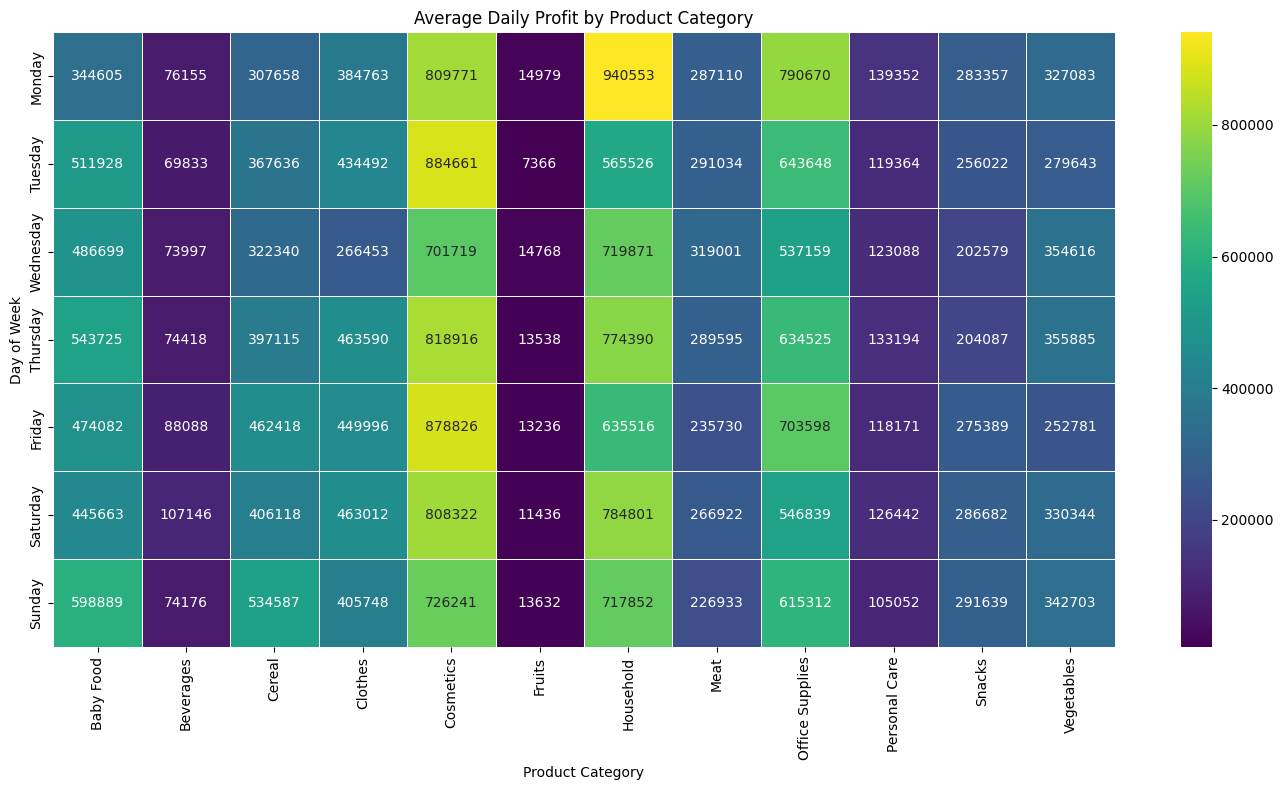

In [ ]:
print("Creating heatmap for Average Daily Profit by Product Category...")

# Ensure the order of days for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average profit per day per product category
# Need to recalculate average profit, not sum.
daily_product_avg_profit = df_merged.groupby(['Order Day of Week', 'Product Category']).agg({
    'Profit': 'mean'
}).reset_index()

daily_product_avg_profit['Order Day of Week'] = pd.Categorical(daily_product_avg_profit['Order Day of Week'], categories=day_order, ordered=True)

# Pivot the table for heatmap
heatmap_data = daily_product_avg_profit.pivot_table(index='Order Day of Week', columns='Product Category', values='Profit')

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Daily Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

**Reasoning**:
To resolve the `FutureWarning` regarding the `observed` parameter in `pivot_table`, I will explicitly set `observed=False` to retain the current behavior and silence the warning.



Creating heatmap for Average Daily Profit by Product Category...


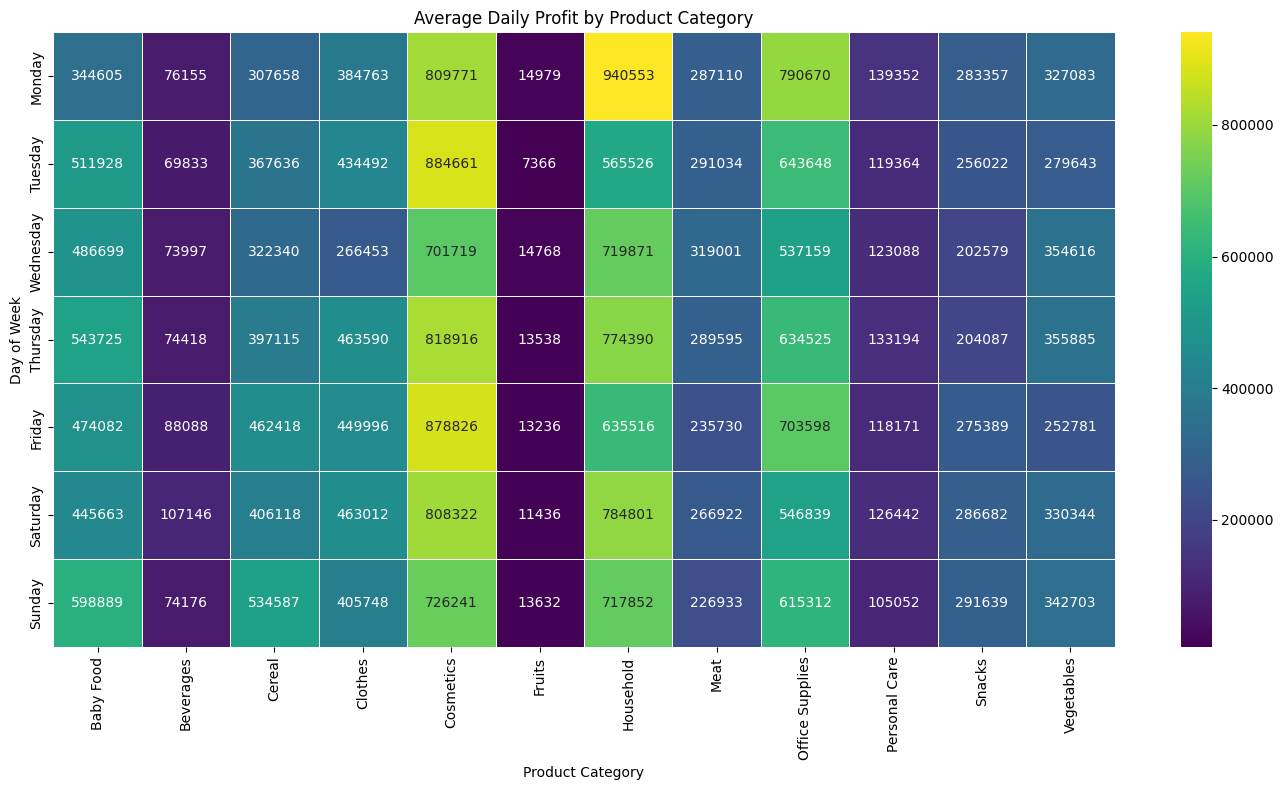

In [ ]:
print("Creating heatmap for Average Daily Profit by Product Category...")

# Ensure the order of days for plotting
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Calculate average profit per day per product category
# Need to recalculate average profit, not sum.
daily_product_avg_profit = df_merged.groupby(['Order Day of Week', 'Product Category']).agg({
    'Profit': 'mean'
}).reset_index()

daily_product_avg_profit['Order Day of Week'] = pd.Categorical(daily_product_avg_profit['Order Day of Week'], categories=day_order, ordered=True)

# Pivot the table for heatmap
heatmap_data = daily_product_avg_profit.pivot_table(index='Order Day of Week', columns='Product Category', values='Profit', observed=False)

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis", linewidths=.5)
plt.title('Average Daily Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

## Reporting

### Subtask:
Create a detailed report including code, charts, explanations, and business logic conclusions, suitable for a resume project.


## Summary:

### Data Analysis Key Findings

*   **Overall Performance**: The company generated a total revenue of \$1,702,129,408.21, a total cost of \$1,200,694,949.21, and a substantial total profit of \$501,434,459.00 from 1328 unique orders across 45 unique countries.
*   **Product Category Performance**:
    *   'Office Supplies' ($402M revenue), 'Household' ($294M revenue), and 'Cosmetics' ($233M revenue) were the top categories by total revenue.
    *   'Cosmetics' (\$92.7M), 'Office Supplies' (\$78M), and 'Household' (\$73M) were the highest profit-generating categories.
    *   'Office Supplies' (617k units), 'Beverages' (613k units), and 'Clothes' (591k units) had the highest units sold.
*   **Geographical Performance**:
    *   Europe significantly dominates sales, contributing \$1.5 billion in revenue and \$448 million in profit, dwarfing Asia's \$93 million in revenue and \$25 million in profit.
    *   The top countries by revenue include Czech Republic (\$53.5M), Ukraine (\$53.2M), and Bosnia and Herzegovina (\$50.1M).
*   **Sales Channel Performance**: The 'Offline' sales channel slightly outperformed the 'Online' channel across all metrics, with \$871.7M in revenue, \$253.4M in profit, and 3.32M units sold, compared to 'Online' channel's \$830.3M revenue, \$247.9M profit, and 3.25M units sold.
*   **Shipping Duration and Profit**: There is no strong linear correlation observed between average shipping duration and total profit at the product category, country, or regional level. Similarly, an overall scatter plot of profit vs. shipping duration for individual orders did not reveal a direct linear relationship. Average shipping durations ranged from approximately 20.76 days (Personal Care) to 27.18 days (Cereal) for product categories, and 21.5 days (Malta) to 32.6 days (Hungary) for top profit countries.
*   **Sales Dynamics and Seasonality**: Sales show fluctuating dynamics over time with peaks and troughs. Daily sales patterns vary by product category, indicating diverse purchasing behaviors across days of the week, with no single dominant day for all categories.

### Insights or Next Steps

*   **Strategic Focus on High-Profit Categories and Regions**: Given the significant profit contribution from 'Cosmetics', 'Office Supplies', and 'Household' categories, and Europe's overwhelming dominance, the company should consider increased investment and targeted marketing strategies in these areas to further capitalize on existing strengths.
*   **Optimize Offline Sales Channel**: The 'Offline' sales channel currently slightly outperforms 'Online'. Investigating the factors contributing to this performance gap could lead to actionable insights to either enhance the 'Online' channel's effectiveness or further leverage the strengths of the 'Offline' channel.
